In [95]:
import ttvfast
import numpy as np
import matplotlib.pyplot as plt
from csv import writer
from astropy.constants import M_sun, M_earth
from scipy import optimize
import pandas as pd

import matplotlib 
matplotlib.rc('xtick', labelsize=23) 
matplotlib.rc('ytick', labelsize=23) 
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rc('text', usetex=True)


#### functions from the analytic formulae for characteristic planet-planet TTV periods

In [96]:
#super period
def super_period(P1, P2, j, k):
    return 1/np.abs((j/P1) - (k/P2))


#normalized super period to P1
def super_period_norm(P2P1, j, k):
    return 1/np.abs((j) - (k/P2P1))


#we can solve for j as the nearest resonance to k... 
#since P1/P2 ~ j/k, then j ~ k*(P1/P2) = k/P2P1
def j_nearest_k(P2P1, k):
    return np.round(k/P2P1)

#we can solve for j as the nearest resonance to k... 
#since P1/P2 ~ j/k, then k ~ j/(P1/P2) = k*P2P1
def k_nearest_j(P2P1, k):
    return np.round(k * P2P1)


#aliasing formula
def alias_period(Pttv, m):
    return 1/np.abs((1/Pttv) + m)


#synodic period
def synodic_period(P1, P2):
    return 1/np.abs((1/P1) - (1/P2))


#synodic period
def synodic_period_norm(P2P1):
    return 1/np.abs((1) - (1/P2P1))


/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_99808/3044949255.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.abs((j) - (k/P2P1))


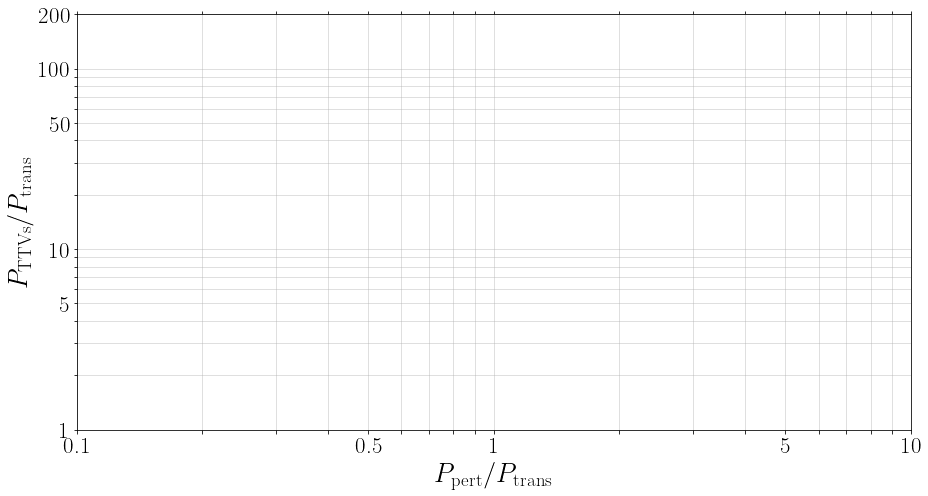

In [97]:
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)


#plot j:k = j:1 from 1/10 to 1/1.5
p2p1_analytic = np.arange(1/10, 1/1.5, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 1)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 1)


# plot Nyquist floor
#ax.axhline(2, 0, 1, color='k')
#ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'$P_\mathrm{TTVs}/P_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/orbital_landscape_skeleton.pdf')

plt.show()

#### now lets plot the super-period replacing j with nearest super-period....


/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_99808/3044949255.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.abs((j) - (k/P2P1))


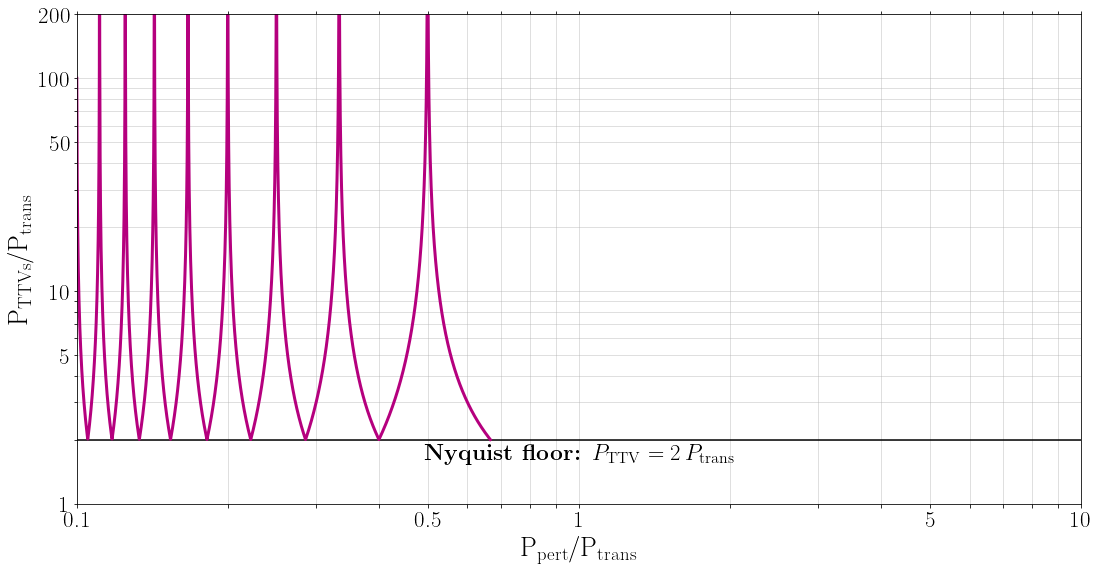

In [98]:
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)


#plot j:k = j:1 from 1/10 to 1/1.5
p2p1_analytic = np.arange(1/10, 1/1.5, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 1)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 1)


# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')

ax.plot(p2p1_analytic, pttv_analytic, color = '#b5007e', lw=3)


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)

plt.show()

#### now split by nearest resonance

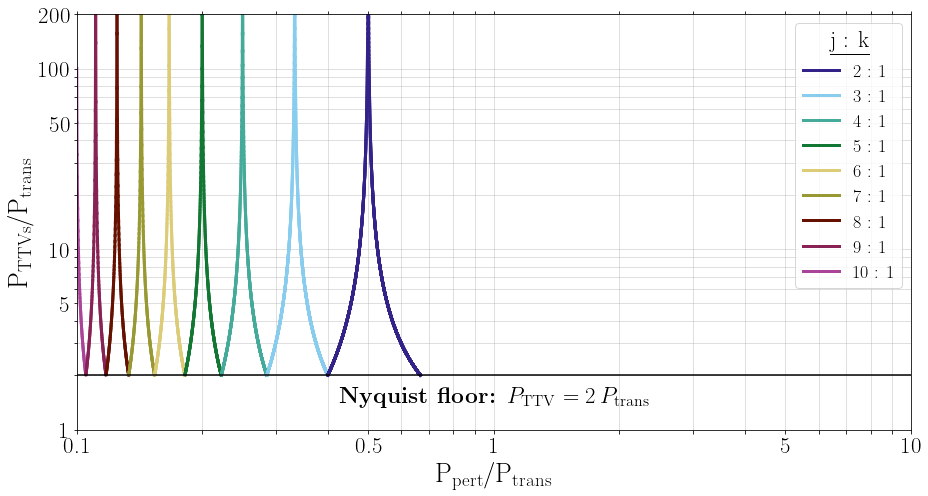

In [99]:
analytic_solution = pd.DataFrame({
    'resonance': pd.Categorical(j_analytic),
})

analytic_solution['p2p1'] = p2p1_analytic
analytic_solution['pttv_analytic'] = pttv_analytic

colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#DDCC77", "#999933", "#661100", "#882255", "#AA4499", "#CC6677"]



resonances = np.arange(2,11,1)
colors_dict = {}
count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict[str(j) + ' : 1'] = legend_dict.pop(j)
    
    
    
    
    
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)

for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw = 3)

    
    
# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')

'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend = plt.legend(markers, legend_dict.keys(), numpoints=1, title=r"\underline{j : k}", fontsize=18, loc = 1)
legend.get_title().set_fontsize('23')

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)

plt.tight_layout()
plt.savefig('./figures/internal_perturbers1.pdf')

plt.show()

#### in low eccentricity regime, large eccentricities unlikely to dominate 
#### what if instead they are all aliased 2 : 1 periods, where we go to successevely higher aliases each time we hit the floor of 2?

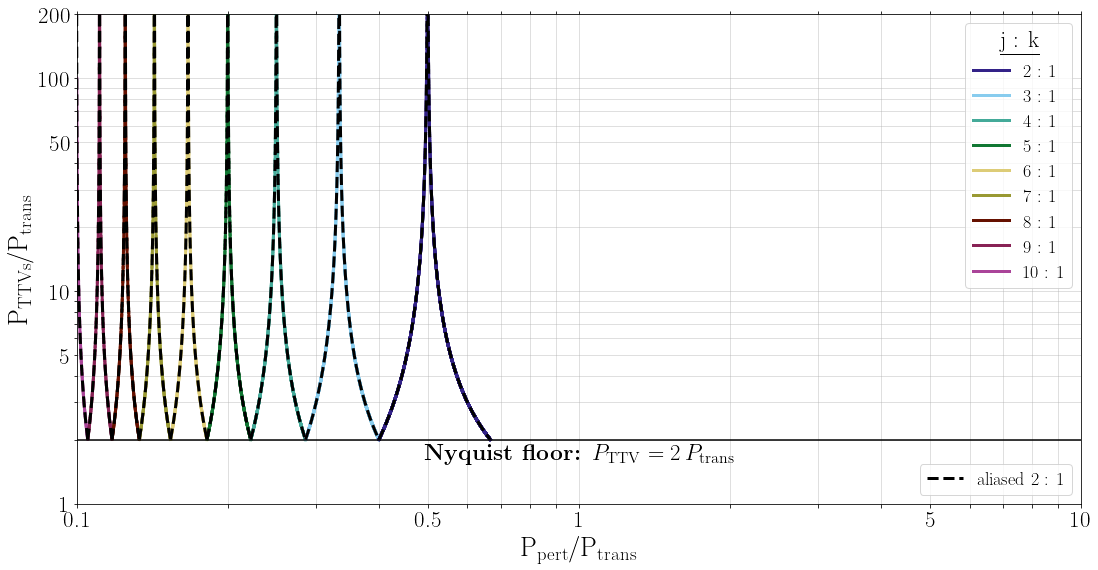

In [100]:
#first define the ranges where resonances dominate...this will change our m factor in the aliases
alias_ranges = []
for j in resonances:
    alias_ranges.append([j-.5, j+.5])
    

    

    
    
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)



# plot the original super period 
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw = 3)


# plot aliased 1:2 periods
m = 0
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period( super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, ls='--', color='k', 
                    lw=3, label='aliased 2 : 1')
    m -= 1
    
# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)


#add a legend value for the aliased periods
#legend_dict['aliased 1:2'] = 'k'

# The following two lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, title=r"\underline{j : k}", fontsize=18, loc = 1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)


ax.legend(handles=line2, loc=4, fontsize = 18)


ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.show()

#### this matches perfectly, so now let's switch the coloring to mark the different aliasing orders

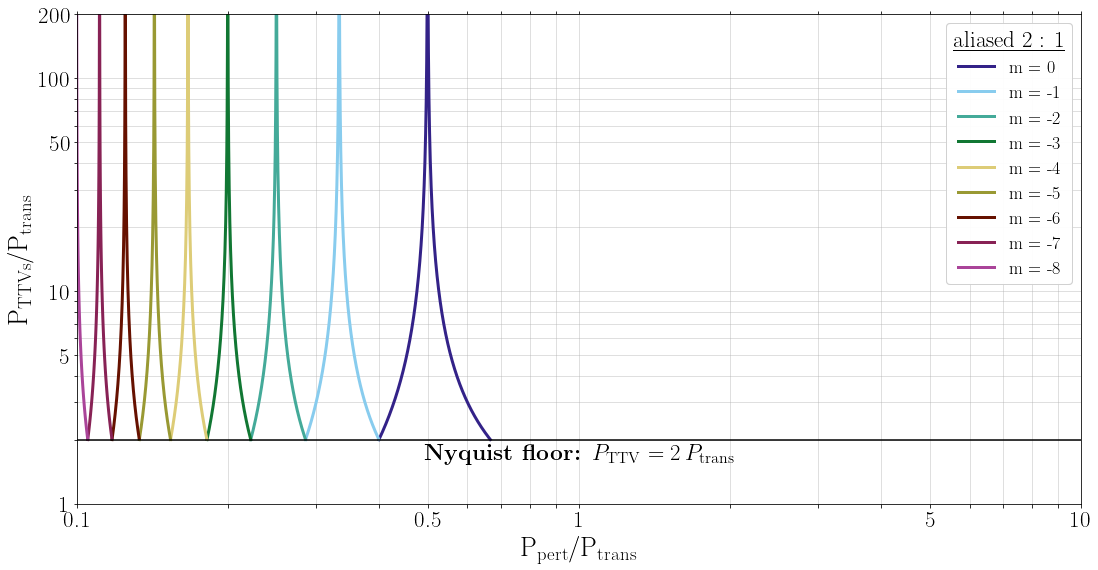

In [101]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
    
    
    
# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period( super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3)
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    m -= 1
    count += 1
    

# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in alias_legend_dict.values()]
legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    title=r"\underline{aliased 2 : 1}", fontsize=18, loc = 1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.show()

#### what about k = 2 resonances?


/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_99808/3044949255.py:8: RuntimeWarning: divide by zero encountered in true_divide
  return 1/np.abs((j) - (k/P2P1))
/var/folders/9z/bcj7jltn3x5_8y20r9cxql3h0000gn/T/ipykernel_99808/4230580297.py:81: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7fdef150b880> has a label of '_line8' which cannot be automatically added to the legend.
  legend2 = ax.legend(handles=line2, loc=4, fontsize = 18, title=r"\underline{j : k}")


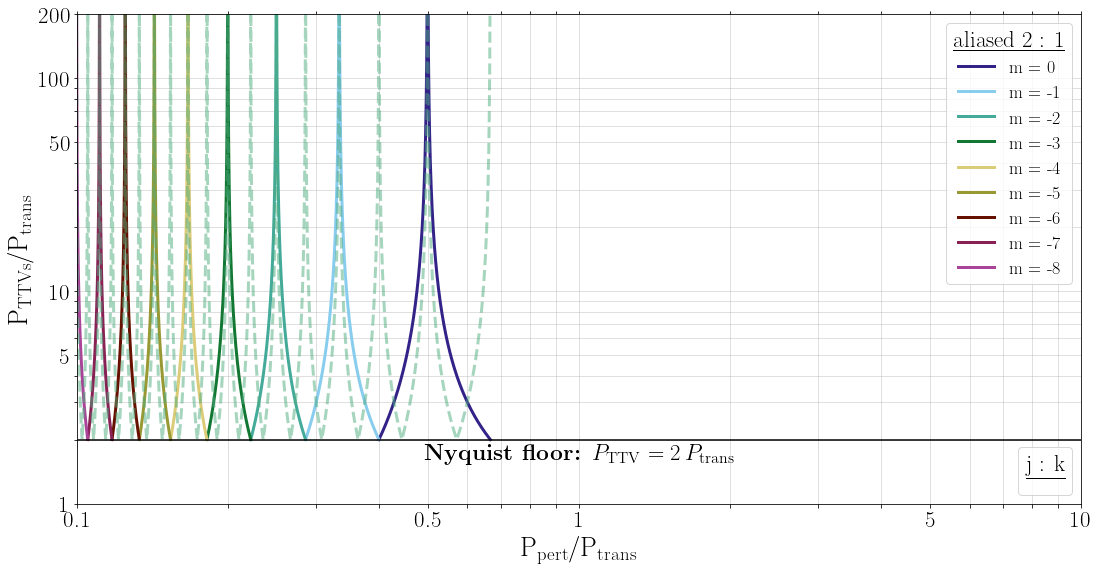

In [102]:




# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
    


# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period( super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3)
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    m -= 1
    count += 1


#plot j:k = j:2 from 1/10 to 1/1.5
p2p1_analytic = np.arange(1/10, 1/1.5, .00001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
ax.plot(p2p1_analytic, pttv_analytic, color = '#4eac7f', lw=3, ls='--', alpha=0.5)




# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in alias_legend_dict.values()]
legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    title=r"\underline{aliased 2 : 1}", fontsize=18, loc = 1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)



legend2 = ax.legend(handles=line2, loc=4, fontsize = 18, title=r"\underline{j : k}")
legend2.get_title().set_fontsize('23')



ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.show()








#### and what about the peak after the 0th aliased 2:1?

#### what if its just aliased 3 : 2?

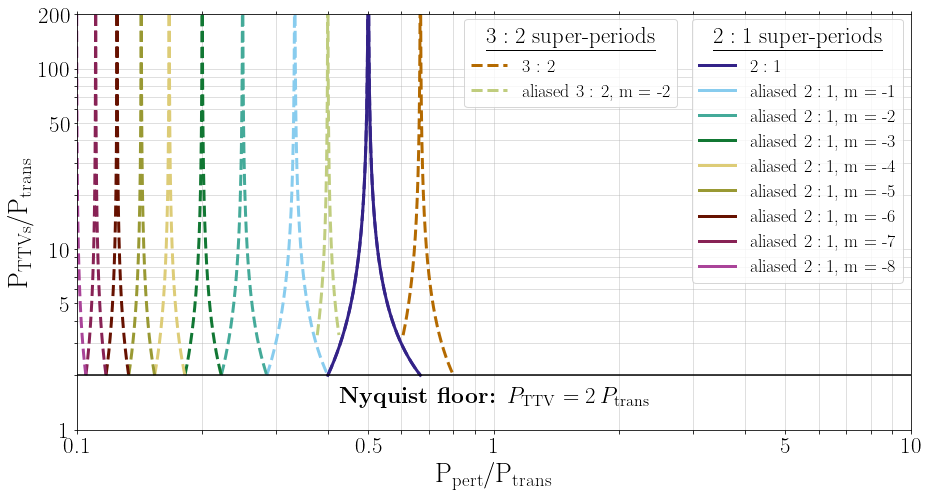

In [141]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--')
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1

    

#add 3:2
p2p1_analytic = np.arange(1/1.65, 0.8, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='--', label = '3 : 2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2')

'''
#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.25, 1/2.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -3 )
line5 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[3], lw=3, ls='--', label = 'aliased 3 : 2, m = -3')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.75, 1/3.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -4 )
line6 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[4], lw=3, ls='--', label = 'aliased 3 : 2, m = -4')
'''




# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 9, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 9, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 9, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 9, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''




ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in alias_legend_dict.values()]
legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    bbox_to_anchor=(.99, .99), borderaxespad=0.,
                    title=r"\underline{$2:1$ super-periods}", fontsize=18, loc=1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

# Adjusting the position of the second legend to be just left of the first one
lines = line2 + line4
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=1, fontsize=18, title=r"\underline{$3:2$ super-periods}", 
                    bbox_to_anchor=(0.72, .99), borderaxespad=0.)
legend2.get_title().set_fontsize('23')



ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/internal_perturbers2.pdf')


plt.show()





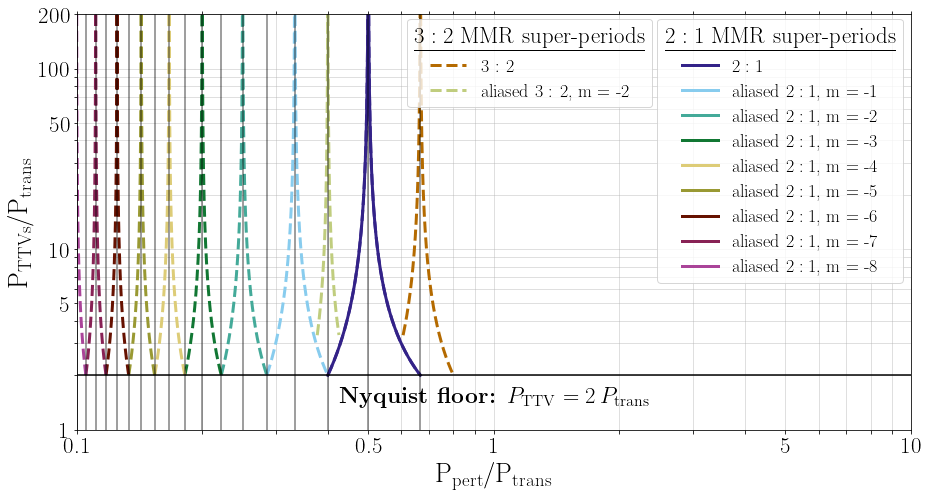

In [104]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--')
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1

    

#add 3:2
p2p1_analytic = np.arange(1/1.65, 0.8, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='--', label = '3 : 2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2')

'''
#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.25, 1/2.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -3 )
line5 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[3], lw=3, ls='--', label = 'aliased 3 : 2, m = -3')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.75, 1/3.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -4 )
line6 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[4], lw=3, ls='--', label = 'aliased 3 : 2, m = -4')
'''



#check period prior boundaries
for per in range(2, 11):
    ax.axvline(1/per, 0, 1, color='k', alpha=.5)
    ax.axvline(1/(per+.5), 0, 1, color='k', alpha=.5)
ax.axvline(2/3, 0, 1, color='k', alpha=.5)


# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 9, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 9, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 9, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 9, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''




ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in alias_legend_dict.values()]
legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    bbox_to_anchor=(.99, .99), borderaxespad=0.,
                    title=r"\underline{$2:1$ MMR super-periods}", fontsize=18, loc=1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

# Adjusting the position of the second legend to be just left of the first one
lines = line2 + line4
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=1, fontsize=18, title=r"\underline{$3:2$ MMR super-periods}", 
                    bbox_to_anchor=(0.69, .99), borderaxespad=0.)
legend2.get_title().set_fontsize('23')



ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()


plt.show()



#### ok so what's going on for outside perturbers?
#### what if we try the same recipe....take the nearest j resonance

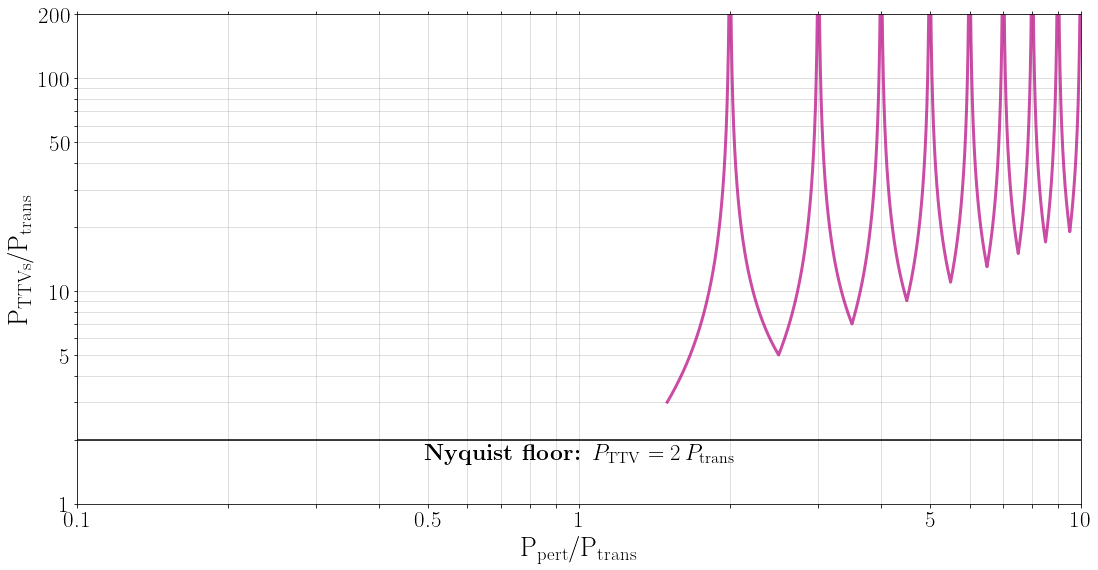

In [105]:
p2p1_analytic = np.arange(1.5, 10, .001)
k_analytic = k_nearest_j(p2p1_analytic, 1)
pttv_analytic = super_period_norm(p2p1_analytic, 1, k_analytic)

fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)

ax.plot(p2p1_analytic, pttv_analytic, color = '#b5007e', lw=3, alpha=0.7)



# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')




ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)

plt.show()

#### label the resonances and replot

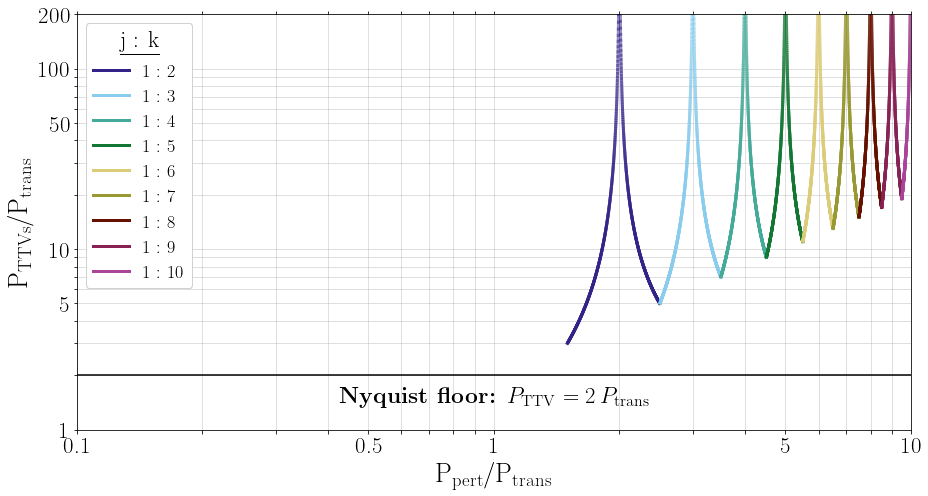

In [106]:
analytic_solution = pd.DataFrame({
    'resonance': pd.Categorical(k_analytic),
})

analytic_solution['p2p1'] = p2p1_analytic
analytic_solution['pttv_analytic'] = pttv_analytic



resonances = np.arange(2,11,1)
colors_dict = {}
count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : ' + str(j)] = legend_dict.pop(j)
    
    
    
    
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)


#plot the analytic super periods
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw = 3, alpha=0.5)
    
    
    
    

# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)





# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k}", fontsize=18, loc = 2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)



plt.tight_layout()
plt.savefig('./figures/external_perturbers_minimal.pdf')


plt.show()







#### again low eccentricity, high order resonances unlikely to dominate
#### let's see what try aliased 1 : 2 looks like?

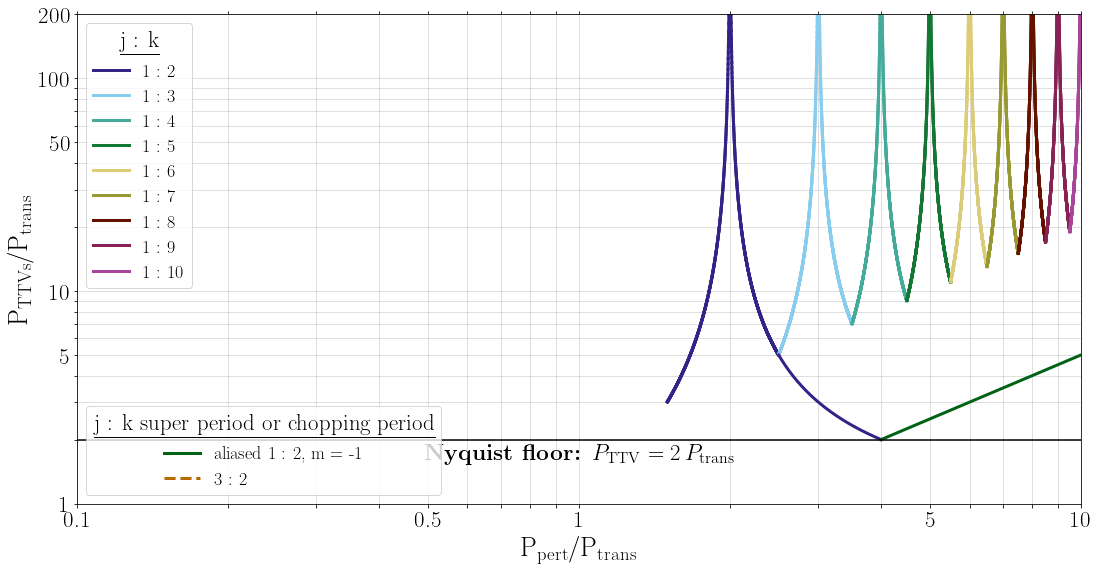

In [107]:
  
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)


#plot the analytic super periods
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw = 3)
    
    
# extend 1:2 periods until nyquist floor
p2p1_analytic = np.arange(2.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color = colors[0], lw=3)


# plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period( super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m )
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#016115', lw=3,
                   label = 'aliased ' + str(j_analytic) + ' : ' + str(k_analytic) + ', m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1
    


    

# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)





# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k}", fontsize=18, loc = 2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)


# legend entries
lines = line1+line2
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=3, fontsize = 18, title=r"\underline{j : k super period or chopping period}")
legend2.get_title().set_fontsize('23')



plt.show()


#### add synodic period and its aliases for distant periods

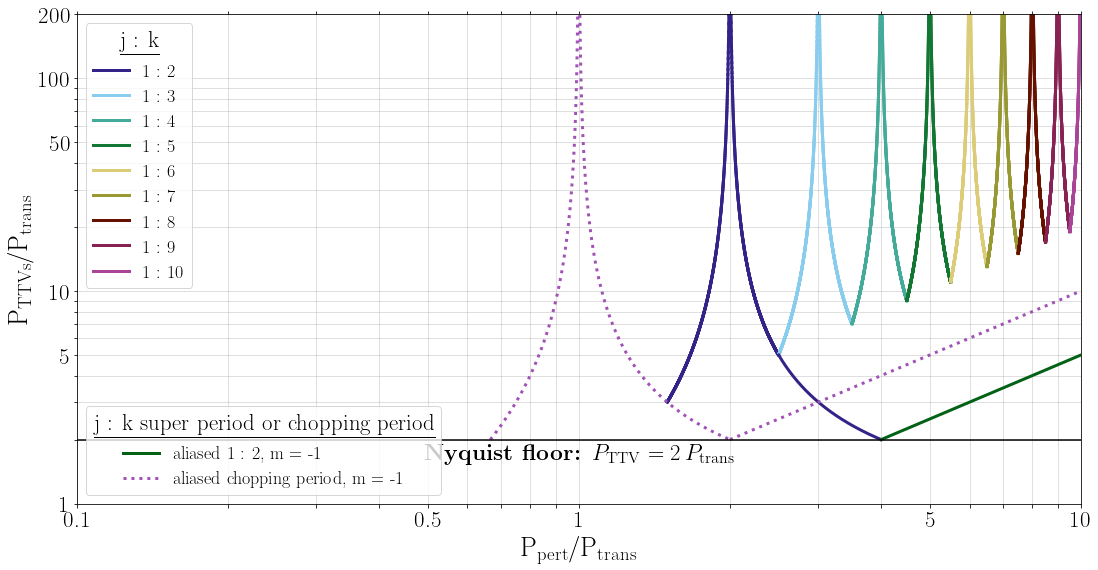

In [108]:
 
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)


#plot the analytic super periods
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw = 3)
    
    
# extend 1:2 periods until nyquist floor
p2p1_analytic = np.arange(2.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color = colors[0], lw=3)


# plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period( super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m )
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#016115', lw=3,
                   label = 'aliased ' + str(j_analytic) + ' : ' + str(k_analytic) + ', m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1
    

    
    
# plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color = '#A052B5', lw=3, ls='dotted')


# plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label = 'aliased chopping period, m = ' + str(m), ls='dotted')
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1
    
    

# plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)





# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k}", fontsize=18, loc = 2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)


# legend entries
lines = line1+line2
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=3, fontsize = 18, title=r"\underline{j : k super period or chopping period}")
legend2.get_title().set_fontsize('23')



plt.show()


#### add chaotic regions from Deck+2013 and extend 1:2 MMR to nyquist floor


In [109]:
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

print(jup_ratio)
print(earth_ratio)

1.3726390756212197
1.0708705650203867


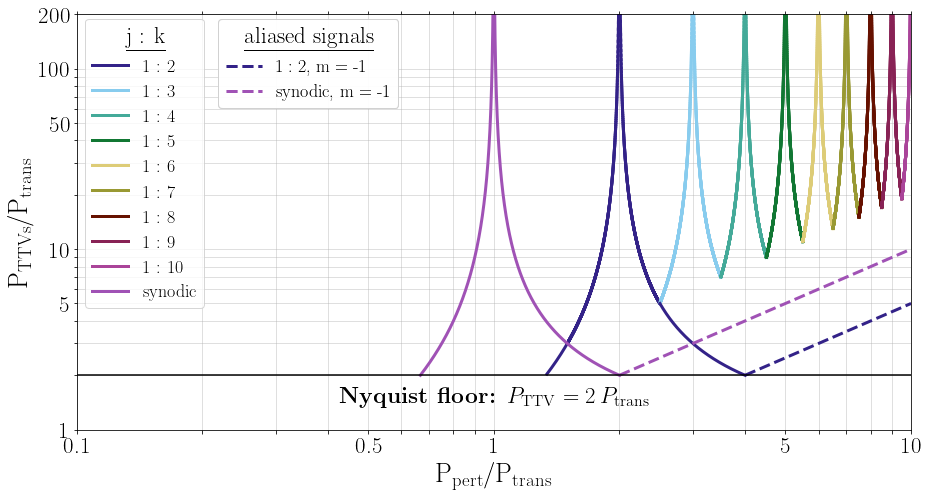

In [149]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=[13,7], sharex=True)

# Plot the analytic super periods
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw=3)
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(2.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='dashed',
                   label=r'$1:2$, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic, m = ' + str(m), ls='dashed')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

    

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize=27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize=27)

# The following lines generate custom fake lines that will be used as legend entries:
legend_dict['synodic'] = '#A052B5'
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k}", fontsize=18, loc=2,
                    bbox_to_anchor=(0.01, .99), borderaxespad=0.)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

# Legend entries
lines = line1+line2
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=3, fontsize=18, title=r"\underline{aliased signals}",
                    bbox_to_anchor=(0.17, .775), borderaxespad=0.)
legend2.get_title().set_fontsize('23')
ax.add_artist(legend2)





plt.tight_layout()



plt.savefig('./figures/external_perturbers1.pdf')
plt.show()


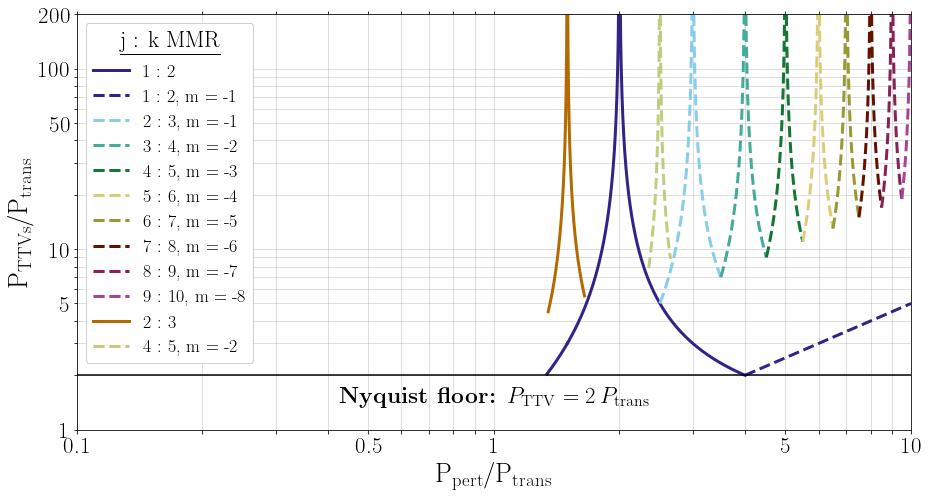

In [111]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=[13,7], sharex=True)

alias_legend_dict = {}
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)
alias_legend_dict['1 : 2'] = colors[0]

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$, m = ' + str(m))
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(m)] = colors[0]
    count += 1



#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.35, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'



# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize=27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize=27)

# The following lines generate custom fake lines that will be used as legend entries:
markers=[]
for key, color in alias_legend_dict.items():
    if 'm' in key:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3, ls='--'))
    else:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3))

legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k MMR}", fontsize=18, loc=2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)





plt.tight_layout()



plt.savefig('./figures/external_perturbers2_noSynodic.pdf')
plt.show()

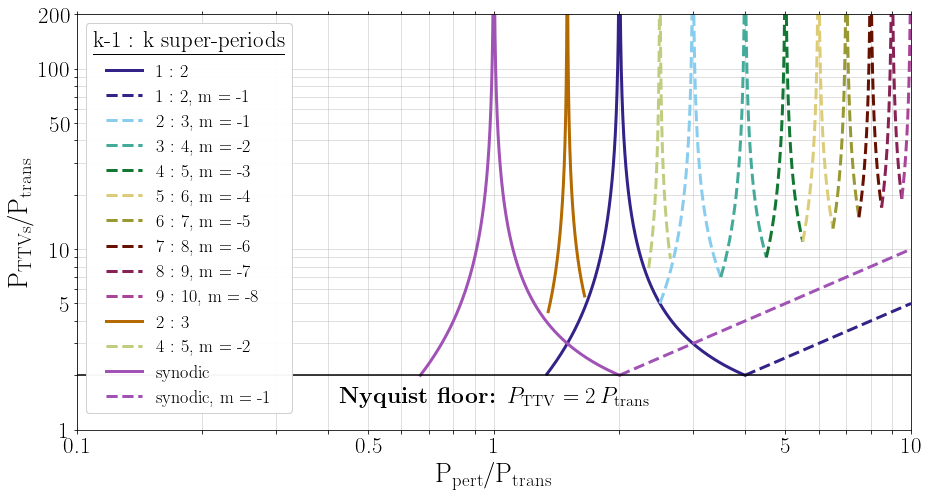

In [148]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=[13,7], sharex=True)

alias_legend_dict = {}
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)
alias_legend_dict['1 : 2'] = colors[0]

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$, m = ' + str(m))
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(m)] = colors[0]
    count += 1



#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.35, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')
alias_legend_dict['synodic'] = '#A052B5'

# Plot aliased synodic period
count = 0
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
            label='synodic, m = ' + str(m), ls='--')

    alias_legend_dict['synodic, m = ' + str(m)] = '#A052B5'
    count += 1
    


# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize=27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize=27)

# The following lines generate custom fake lines that will be used as legend entries:
markers=[]
for key, color in alias_legend_dict.items():
    if 'm' in key:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3, ls='--'))
    else:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3))

legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    title=r"\underline{k-1 : k super-periods}", fontsize=18, loc=2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)





plt.tight_layout()



plt.savefig('./figures/external_perturbers2.pdf')
plt.show()


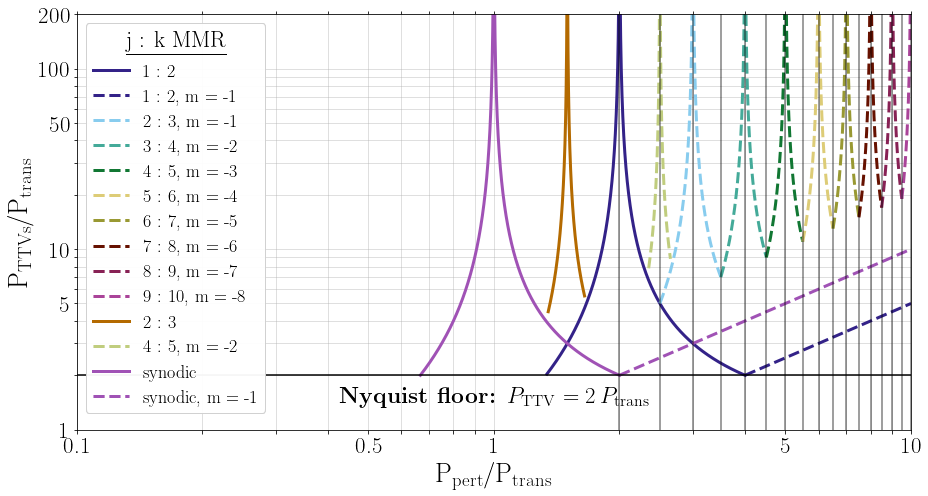

In [113]:
from matplotlib.patches import Patch

fig, ax = plt.subplots(1, figsize=[13,7], sharex=True)

alias_legend_dict = {}
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)
alias_legend_dict['1 : 2'] = colors[0]

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line1 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$, m = ' + str(m))
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(m)] = colors[0]
    count += 1



#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.35, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')
alias_legend_dict['synodic'] = '#A052B5'

# Plot aliased synodic period
count = 0
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
            label='synodic, m = ' + str(m), ls='--')

    alias_legend_dict['synodic, m = ' + str(m)] = '#A052B5'
    count += 1
    


#check period prior boundaries
for per in range(2, 11):
    ax.axvline(per, 0, 1, color='k', alpha=.5)
    ax.axvline(per+.5, 0, 1, color='k', alpha=.5)
    
    
# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


'''
#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
'''



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize=27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize=27)

# The following lines generate custom fake lines that will be used as legend entries:
markers=[]
for key, color in alias_legend_dict.items():
    if 'm' in key:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3, ls='--'))
    else:
        markers.append(plt.Line2D([0,0],[0,0],color=color, lw=3))

legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k MMR}", fontsize=18, loc=2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)





plt.tight_layout()



plt.show()


#### combine it all

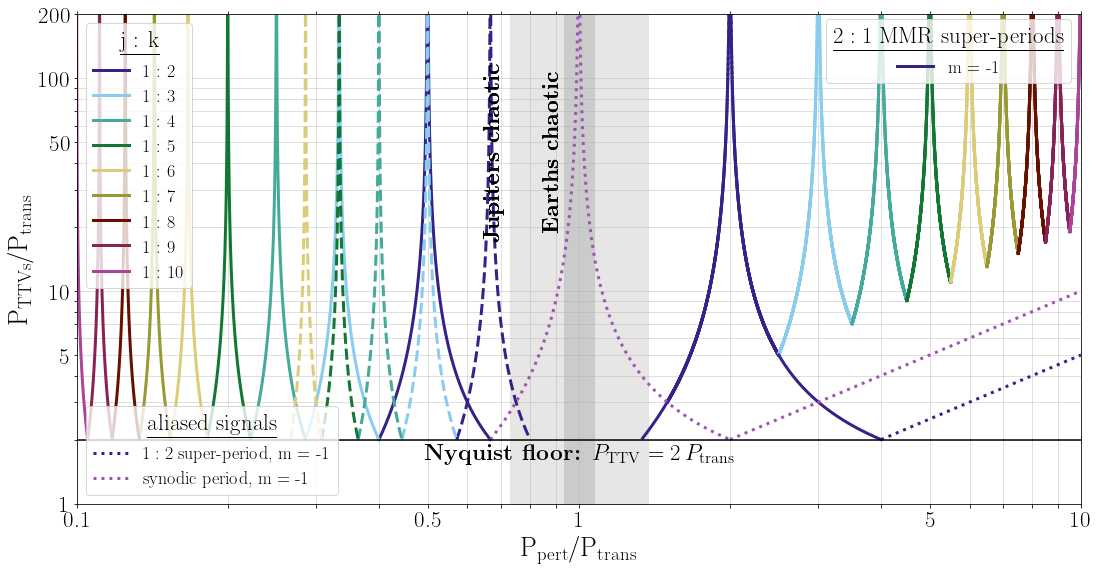

In [114]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
    
# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3)
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1

    

#add 3:2
p2p1_analytic = np.arange(1/1.75, 0.8, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[0], lw=3, ls='--', label = '3 : 2')

#add aliased 3:2  
p2p1_analytic = np.arange(1/2.25, 1/1.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -1 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[1], lw=3, ls='--', label = 'aliased 3 : 2, m = -1')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.75, 1/2.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[2], lw=3, ls='--', label = 'aliased 3 : 2, m = -2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.25, 1/2.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -3 )
line5 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[3], lw=3, ls='--', label = 'aliased 3 : 2, m = -3')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.75, 1/3.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -4 )
line6 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[4], lw=3, ls='--', label = 'aliased 3 : 2, m = -4')





# Plot the analytic super periods oouter
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw=3)
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(2.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='dotted',
                   label=r'$1:2$ super-period, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='dotted')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='dotted')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/earth_ratio-.05, 45, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(1/jup_ratio-.05, 45, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)





ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in alias_legend_dict.values()]
legend1 = ax.legend(markers, alias_legend_dict.keys(), numpoints=1, 
                    bbox_to_anchor=(.99, .99), borderaxespad=0.,
                    title=r"\underline{$2:1$ MMR super-periods}", fontsize=18, loc=1)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

# Adjusting the position of the second legend to be just left of the first one
lines = line2 + line3 + line4 + line5 + line6
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=1, fontsize=18, title=r"\underline{$3:2$ MMR super-periods}", 
                    bbox_to_anchor=(0.74, .99), borderaxespad=0.)
legend2.get_title().set_fontsize('23')




# The following lines generate custom fake lines that will be used as legend entries:
markers = [plt.Line2D([0,0],[0,0],color=color, lw=3) for color in legend_dict.values()]
legend1 = ax.legend(markers, legend_dict.keys(), numpoints=1, 
                    title=r"\underline{j : k}", fontsize=18, loc=2)
legend1.get_title().set_fontsize('23')
ax.add_artist(legend1)

# Legend entries
lines = line8+line9
labs = [line.get_label() for line in lines]
legend2 = ax.legend(lines, labs, loc=3, fontsize=18, title=r"\underline{aliased signals}")
legend2.get_title().set_fontsize('23')



ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.show()



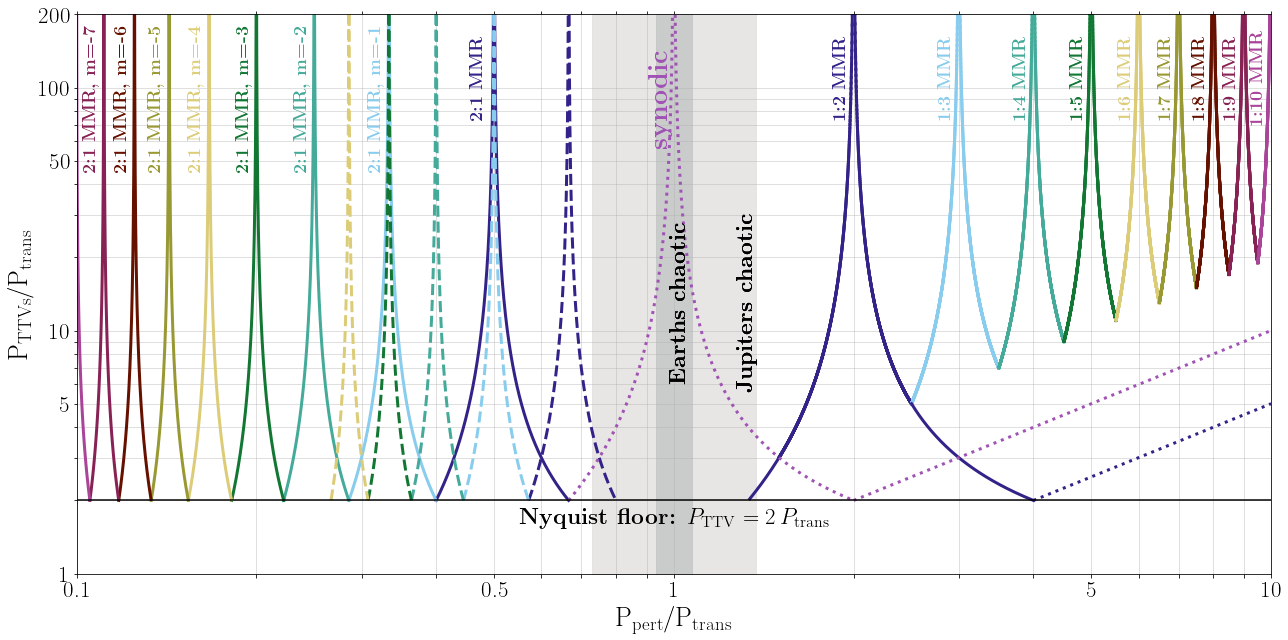

In [115]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    
    
# plot aliased 1:2 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3)
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.75, 0.8, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[0], lw=3, ls='--', label = '3 : 2')

#add aliased 3:2  
p2p1_analytic = np.arange(1/2.25, 1/1.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -1 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[1], lw=3, ls='--', label = 'aliased 3 : 2, m = -1')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.75, 1/2.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[2], lw=3, ls='--', label = 'aliased 3 : 2, m = -2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.25, 1/2.75, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -3 )
line5 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[3], lw=3, ls='--', label = 'aliased 3 : 2, m = -3')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/3.75, 1/3.25, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -4 )
line6 = ax.plot(p2p1_analytic, pttv_analytic, color = colors[4], lw=3, ls='--', label = 'aliased 3 : 2, m = -4')





# Plot the analytic super periods oouter
for i in range(len(analytic_solution['p2p1'])-1):
    i = int(i)
    ax.plot([analytic_solution['p2p1'][i], analytic_solution['p2p1'][i+1]],
             [analytic_solution['pttv_analytic'][i], analytic_solution['pttv_analytic'][i+1]], 
             color=colors_dict[analytic_solution['resonance'][i]], lw=3)
    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(2.5, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 1.5, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)

# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='dotted',
                   label=r'$1:2$ super-period, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='dotted')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='dotted')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
for ii in range(0, 9):
    ax.text(ii+2-(.05*(ii+1))-.05, 110, r'\textbf{1:'+str(ii+2)+' MMR}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add mmr labels inner
ax.text(1/2-.03, 110, r'\textbf{2:1 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{2:1 MMR, m=-'+str(ii)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.95, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)


ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)




plt.tight_layout()

plt.show()


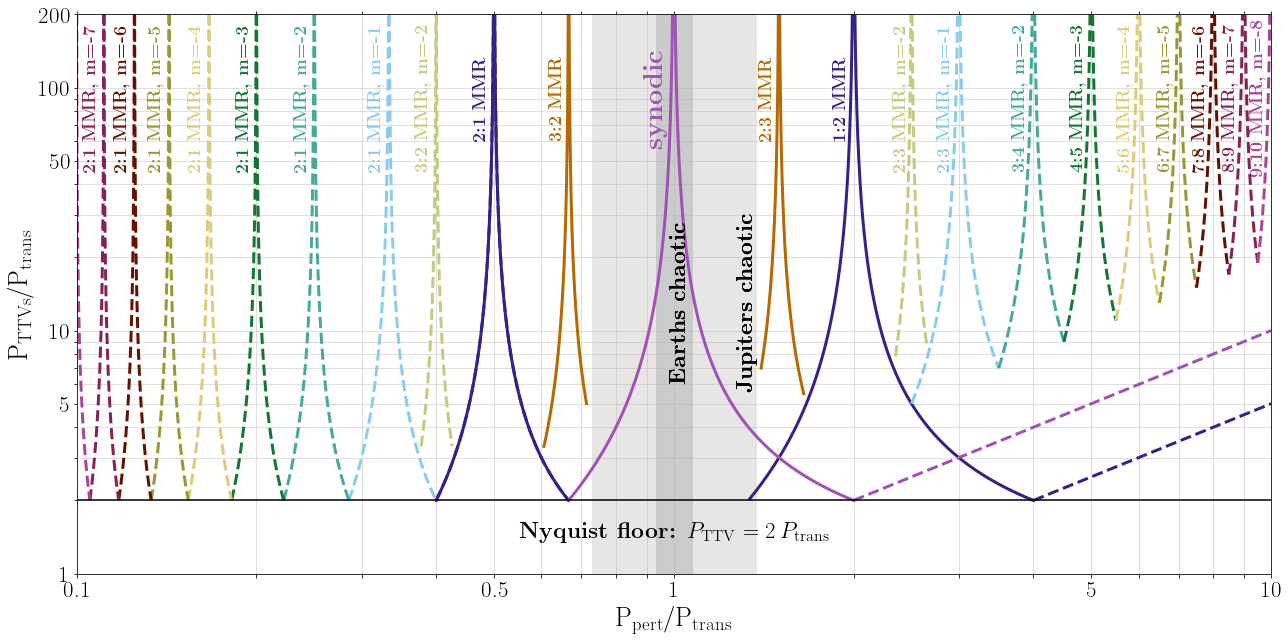

In [116]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    


#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--')
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2')


# Plot the analytic super periods oouter

    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

    
    
    
    
#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{'+str(k-1)+':'+str(k)+' MMR, m=-'+str(k-2)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{2:3 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{2:1 MMR, m=-'+str(ii)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{3:2 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/analytic_landscape.pdf')



plt.show()


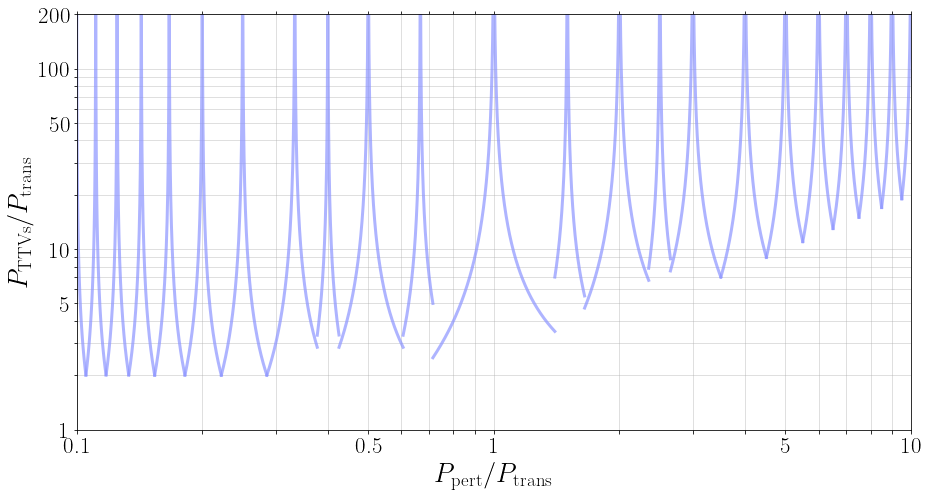

In [117]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    


#plot 2:1
p2p1_analytic = np.arange(1/2.35, 1/1.65, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, alpha=0.7)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    if m == -1:
        p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/2.65, .0001)
    else:
        p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )


    if m != 0:
        line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#8c94ff', lw=3, ls='-', alpha=0.7)
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = '3 : 2', alpha=0.7)

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = 'aliased 3 : 2, m = -2', alpha=0.7)









####
####
# Plot the analytic super periods outer

    
# plot 1:2
p2p1_analytic = np.arange(1.65, 5/2-.15, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, alpha=0.7)


    
    
    
#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3
    if k == 3:
        p2p1_analytic = np.arange(5/2+.15, k+.5, .0001)
    else:
        p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', alpha=0.7)
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = '2 : 3', alpha=0.7)
alias_legend_dict['2 : 3'] = '#8c94ff'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', alpha=0.7)
alias_legend_dict['4 : 5, m = -2'] = '#8c94ff'


# Plot synodic period
p2p1_analytic = np.arange(1/1.4, 1.4, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, ls='-', alpha=0.7)



# Plot Nyquist floor
#ax.axhline(2, 0, 1, color='k')
#ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)



ax.set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'$P_\mathrm{TTVs}/P_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/analytic_landscape_simple.pdf')



plt.show()

## now in include numerical simulations

In [118]:
def hill_stability_check(mu1, mu2, P1, P2, e1, e2):

	'''
	tests Petit et al. (2018) Hill criterion
	planet 1 needs to be the inner

	Inputs
	mu1, mu2: mp/mstar
	P1, P2: periods
	e1, e2: eccenticities

	Outputs
	Hill_stable: Boolean of whether the system is Hill stable

	'''

	gamma = (mu1/mu2)
	P1P2third = (P1/P2)**(1/3)
	alpha = P1P2third**(2)
	epsilon = mu1 + mu2
	e1x = np.sqrt( 1. - e1**(2) )
	e2x = np.sqrt( 1. - e2**(2) )

	# C of the system, Eq 23 of Petit et al. (2018)
	inc1 = 0. # coplanar approx
	inc2 = 0. # coplanar approx
	Csys = gamma*P1P2third*( 1. - e1x*np.cos(inc1) ) + 1. - e2x*np.cos(inc2)

	# Critical C, Eq 26 of Petit et al. (2018)
	k1 = 3**(4/3)
	Ccrit = ( k1*epsilon**(2/3)*gamma )/( 1. + gamma )**(2)
	Ccrit = (alpha/(gamma+alpha))*(1.+Ccrit)
	Ccrit = gamma*P1P2third + 1. - np.sqrt( (1.+gamma)**(3)*Ccrit )


	if Csys < Ccrit:
		Hill_stable = True
	else:
		Hill_stable = False


	return Hill_stable















def chaos_stability_check(mu1, mu2, P1, P2, e1, e2, w1, w2):

	'''
	as presented in Tamayo et al 2021, 
	https://iopscience.iop.org/article/10.3847/0004-637X/823/2/118/pdf
	but originally from Hadden and Lithwick 2018...
	https://iopscience.iop.org/article/10.3847/1538-3881/aad32c/pdf

	tests Hadden & Lithwick (2018) chaos criterion
	technically 1 is inner planet, 2 is outer planet, but we use an abs
	function around the a2-a1 functions which should remove this issue
	because cos(x) is symmetric about x too

	Inputs
	mu1, mu2: mp/mstar
	P1, P2: periods
	e1, e2: eccenticities
	w1, w2: varpi of each planet... longitude of perihelion = omega + Omega

	Outputs
	non_chaotic: Boolean of whether the system is NOT chaotic

	'''
	
	roothalf = np.sqrt(1./2.)
	third = 1./3.
	twothirds = 2./3.
	fourthirds = 4./3.
	

	# Z of the system, Eq 16 of Hadden & Lithwick (2018)
	Zsys = roothalf*np.sqrt( e1**2 + e2**2 - ( 2.*e1*e2*np.cos(w1-w2) ) )

	# Not strictly true, but OK since we only ever use a1/a2 ratios
	a1 = P1**(twothirds)
	a2 = P2**(twothirds)

	# Critical Z, Eq 19 of Hadden & Lithwick (2018)
	Zcrit = -2.2*(mu1+mu2)**third*np.absolute(a2/(a2-a1))**fourthirds
	Zcrit = roothalf*np.absolute((a2-a1)/a1)*np.exp( Zcrit )

	if Zsys < Zcrit: 
		non_chaotic = True
	else:
		non_chaotic = False


	return non_chaotic




In [119]:
import csv
import ast
import os
from ast import literal_eval


directories1 = [
    './jup_jup/20240816_1/',
    './jup_jup/20240816_2/'
            ]

directories2 = [
    './earth_jup/20240816_1/',
    './earth_jup/20240816_2/'
            ]

directories3 = [
    './earth_earth/20240816_1/',
    './earth_earth/20240816_2/'
            ]


directories4 = [
    './jup_earth/20240816_1/',
    './jup_earth/20240816_2/'
            ]




In [120]:
lstsq_ppert_all1 = []
lstsq_ptrans_all1 = []
input_pperts_all1 = []
for directory in directories1:
    for csv_file in ['lstsq_ppert.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                lstsq_ppert = list_of_lists
        lstsq_ppert_all1.append(lstsq_ppert)
                

    for csv_file in ['lstsq_ptrans.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                lstsq_ptrans = list_of_lists
        lstsq_ptrans_all1.append(lstsq_ptrans)
            
       
    
    for csv_file in ['pperts.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                input_pperts = list_of_lists
        input_pperts_all1.append(input_pperts)
        
        
        
transit_times_pert_all1 = []
transit_times_trans_all1 = []

for directory in directories1:
    for csv_file in ['transit_times_pert.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                transit_times_pert = list_of_lists
                
        transit_times_pert_all1.append(transit_times_pert)


    for csv_file in ['transit_times_trans.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                transit_times_trans = list_of_lists
                
        transit_times_trans_all1.append(transit_times_trans)
        
        
        
        
        
        
        
#### optimized params are: T0, P, alpha_ttv, beta_ttv, P_ttv

optimized_params_all1 = []
alpha_1_ttv_all1 = []
beta_1_ttv_all1 = []
P_1_ttv_all1 = []
amplitude_ttv_all1 = []

for directory in directories1:
    for csv_file in ['optimized_params.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                optimized_params = list_of_lists
        optimized_params_all1.append(optimized_params)


    # define empty lists
    alpha_1_ttv = []
    beta_1_ttv = []
    P_1_ttv = []
    amplitude_ttv = []
    
    #alpha_2_ttv = []
    #beta_2_ttv = []
    #P_2_ttv = []

    for ii in range(0, len(optimized_params)):
        # define empty lists
        alpha_1_ttv_sub = []
        beta_1_ttv_sub = []
        P_1_ttv_sub = []
        amplitude_sub = []
        for jj in range(0, len(optimized_params[ii])):
            alpha_1_ttv_sub.append(optimized_params[ii][jj][1][2])
            beta_1_ttv_sub.append(optimized_params[ii][jj][1][3])
            P_1_ttv_sub.append(optimized_params[ii][jj][1][4])
            amplitude_sub.append(np.sqrt(optimized_params[ii][jj][1][2]**2.+optimized_params[ii][jj][1][3]**2.)*24.*60.)

        alpha_1_ttv.append(alpha_1_ttv_sub)
        beta_1_ttv.append(beta_1_ttv_sub)
        P_1_ttv.append(P_1_ttv_sub)
        amplitude_ttv.append(amplitude_sub)
        
    alpha_1_ttv_all1.append(alpha_1_ttv)
    beta_1_ttv_all1.append(beta_1_ttv)
    P_1_ttv_all1.append(P_1_ttv)
    amplitude_ttv_all1.append(amplitude_ttv)





orbital_params_all1 = []
for directory in directories1:
    for csv_file in ['orbital_params.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:


                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]
                # Append the lists to the result
                orbital_params = list_of_lists
    orbital_params_all1.append(orbital_params)

In [121]:
lstsq_ppert_all2 = []
lstsq_ptrans_all2 = []
input_pperts_all2 = []
for directory in directories2:
    for csv_file in ['lstsq_ppert.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                lstsq_ppert = list_of_lists
        lstsq_ppert_all2.append(lstsq_ppert)
                

    for csv_file in ['lstsq_ptrans.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                lstsq_ptrans = list_of_lists
        lstsq_ptrans_all2.append(lstsq_ptrans)
            
       
    
    for csv_file in ['pperts.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                input_pperts = list_of_lists
        input_pperts_all2.append(input_pperts)
        
        
        
transit_times_pert_all2 = []
transit_times_trans_all2 = []

for directory in directories2:
    for csv_file in ['transit_times_pert.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                transit_times_pert = list_of_lists
                
        transit_times_pert_all2.append(transit_times_pert)


    for csv_file in ['transit_times_trans.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                transit_times_trans = list_of_lists
                
        transit_times_trans_all2.append(transit_times_trans)
        
        
        
        
        
        
        
#### optimized params are: T0, P, alpha_ttv, beta_ttv, P_ttv

optimized_params_all2 = []
alpha_1_ttv_all2 = []
beta_1_ttv_all2 = []
P_1_ttv_all2 = []
amplitude_ttv_all2 = []

for directory in directories2:
    for csv_file in ['optimized_params.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:
                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]

                # Append the lists to the result
                optimized_params = list_of_lists
        optimized_params_all2.append(optimized_params)


    # define empty lists
    alpha_1_ttv = []
    beta_1_ttv = []
    P_1_ttv = []
    amplitude_ttv = []
    
    #alpha_2_ttv = []
    #beta_2_ttv = []
    #P_2_ttv = []

    for ii in range(0, len(optimized_params)):
        # define empty lists
        alpha_1_ttv_sub = []
        beta_1_ttv_sub = []
        P_1_ttv_sub = []
        amplitude_sub = []
        for jj in range(0, len(optimized_params[ii])):
            alpha_1_ttv_sub.append(optimized_params[ii][jj][1][2])
            beta_1_ttv_sub.append(optimized_params[ii][jj][1][3])
            P_1_ttv_sub.append(optimized_params[ii][jj][1][4])
            amplitude_sub.append(np.sqrt(optimized_params[ii][jj][1][2]**2.+optimized_params[ii][jj][1][3]**2.)*24.*60.)

        alpha_1_ttv.append(alpha_1_ttv_sub)
        beta_1_ttv.append(beta_1_ttv_sub)
        P_1_ttv.append(P_1_ttv_sub)
        amplitude_ttv.append(amplitude_sub)
        
    alpha_1_ttv_all2.append(alpha_1_ttv)
    beta_1_ttv_all2.append(beta_1_ttv)
    P_1_ttv_all2.append(P_1_ttv)
    amplitude_ttv_all2.append(amplitude_ttv)





orbital_params_all2 = []
for directory in directories2:
    for csv_file in ['orbital_params.csv']:
        csv_file_path = directory+csv_file
        # Get the size of the file in bytes
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        # Read the contents of the CSV file
        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)

            # Assuming there is only one row in the CSV file
            for row in csv_reader:


                # Convert the string representation of a list to a list using ast.literal_eval
                list_of_lists = [literal_eval(item) for item in row]
                # Append the lists to the result
                orbital_params = list_of_lists
    orbital_params_all2.append(orbital_params)


In [122]:
lstsq_ppert_all3 = []
lstsq_ptrans_all3 = []
input_pperts_all3 = []
for directory in directories3:
    for csv_file in ['lstsq_ppert.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                lstsq_ppert = list_of_lists
        lstsq_ppert_all3.append(lstsq_ppert)

    for csv_file in ['lstsq_ptrans.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                lstsq_ptrans = list_of_lists
        lstsq_ptrans_all3.append(lstsq_ptrans)

    for csv_file in ['pperts.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                input_pperts = list_of_lists
        input_pperts_all3.append(input_pperts)

transit_times_pert_all3 = []
transit_times_trans_all3 = []

for directory in directories3:
    for csv_file in ['transit_times_pert.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                transit_times_pert = list_of_lists
                
        transit_times_pert_all3.append(transit_times_pert)

    for csv_file in ['transit_times_trans.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                transit_times_trans = list_of_lists
                
        transit_times_trans_all3.append(transit_times_trans)

optimized_params_all3 = []
alpha_1_ttv_all3 = []
beta_1_ttv_all3 = []
P_1_ttv_all3 = []
amplitude_ttv_all3 = []

for directory in directories3:
    for csv_file in ['optimized_params.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                optimized_params = list_of_lists
        optimized_params_all3.append(optimized_params)

    alpha_1_ttv = []
    beta_1_ttv = []
    P_1_ttv = []
    amplitude_ttv = []

    for ii in range(0, len(optimized_params)):
        alpha_1_ttv_sub = []
        beta_1_ttv_sub = []
        P_1_ttv_sub = []
        amplitude_sub = []
        for jj in range(0, len(optimized_params[ii])):
            alpha_1_ttv_sub.append(optimized_params[ii][jj][1][2])
            beta_1_ttv_sub.append(optimized_params[ii][jj][1][3])
            P_1_ttv_sub.append(optimized_params[ii][jj][1][4])
            amplitude_sub.append(np.sqrt(optimized_params[ii][jj][1][2] ** 2 + optimized_params[ii][jj][1][3] ** 2) * 24. * 60.)

        alpha_1_ttv.append(alpha_1_ttv_sub)
        beta_1_ttv.append(beta_1_ttv_sub)
        P_1_ttv.append(P_1_ttv_sub)
        amplitude_ttv.append(amplitude_sub)
        
    alpha_1_ttv_all3.append(alpha_1_ttv)
    beta_1_ttv_all3.append(beta_1_ttv)
    P_1_ttv_all3.append(P_1_ttv)
    amplitude_ttv_all3.append(amplitude_ttv)

orbital_params_all3 = []
for directory in directories3:
    for csv_file in ['orbital_params.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                orbital_params = list_of_lists
    orbital_params_all3.append(orbital_params)


In [123]:
lstsq_ppert_all4 = []
lstsq_ptrans_all4 = []
input_pperts_all4 = []
for directory in directories4:
    for csv_file in ['lstsq_ppert.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                lstsq_ppert = list_of_lists
        lstsq_ppert_all4.append(lstsq_ppert)

    for csv_file in ['lstsq_ptrans.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                lstsq_ptrans = list_of_lists
        lstsq_ptrans_all4.append(lstsq_ptrans)

    for csv_file in ['pperts.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                input_pperts = list_of_lists
        input_pperts_all4.append(input_pperts)

transit_times_pert_all4 = []
transit_times_trans_all4 = []

for directory in directories4:
    for csv_file in ['transit_times_pert.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                transit_times_pert = list_of_lists
                
        transit_times_pert_all4.append(transit_times_pert)

    for csv_file in ['transit_times_trans.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                transit_times_trans = list_of_lists
                
        transit_times_trans_all4.append(transit_times_trans)

optimized_params_all4 = []
alpha_1_ttv_all4 = []
beta_1_ttv_all4 = []
P_1_ttv_all4 = []
amplitude_ttv_all4 = []

for directory in directories4:
    for csv_file in ['optimized_params.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                optimized_params = list_of_lists
        optimized_params_all4.append(optimized_params)

    alpha_1_ttv = []
    beta_1_ttv = []
    P_1_ttv = []
    amplitude_ttv = []

    for ii in range(0, len(optimized_params)):
        alpha_1_ttv_sub = []
        beta_1_ttv_sub = []
        P_1_ttv_sub = []
        amplitude_sub = []
        for jj in range(0, len(optimized_params[ii])):
            alpha_1_ttv_sub.append(optimized_params[ii][jj][1][2])
            beta_1_ttv_sub.append(optimized_params[ii][jj][1][3])
            P_1_ttv_sub.append(optimized_params[ii][jj][1][4])
            amplitude_sub.append(np.sqrt(optimized_params[ii][jj][1][2] ** 2 + optimized_params[ii][jj][1][3] ** 2) * 24. * 60.)

        alpha_1_ttv.append(alpha_1_ttv_sub)
        beta_1_ttv.append(beta_1_ttv_sub)
        P_1_ttv.append(P_1_ttv_sub)
        amplitude_ttv.append(amplitude_sub)
        
    alpha_1_ttv_all4.append(alpha_1_ttv)
    beta_1_ttv_all4.append(beta_1_ttv)
    P_1_ttv_all4.append(P_1_ttv)
    amplitude_ttv_all4.append(amplitude_ttv)

orbital_params_all4 = []
for directory in directories4:
    for csv_file in ['orbital_params.csv']:
        csv_file_path = directory + csv_file
        file_size = os.path.getsize(csv_file_path)
        csv.field_size_limit(file_size)

        with open(csv_file_path, 'r', newline='') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                list_of_lists = [literal_eval(item) for item in row]
                orbital_params = list_of_lists
    orbital_params_all4.append(orbital_params)


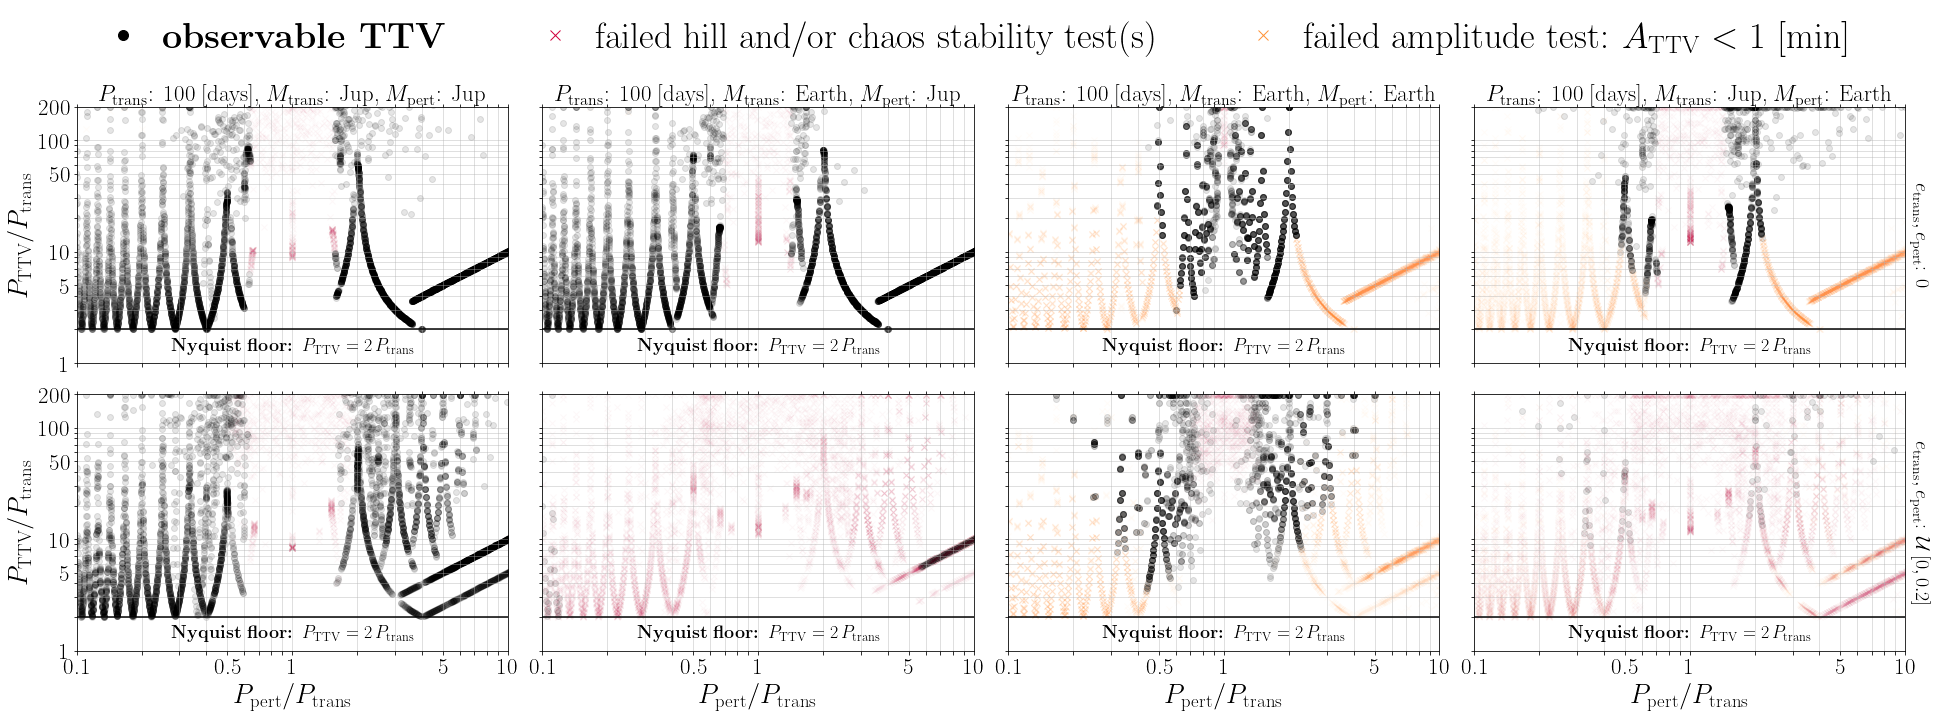

In [124]:
# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]

# Titles for each column
column_titles = [r'$P_\mathrm{trans}$: 100 [days], $M_\mathrm{trans}$: Jup, $M_\mathrm{pert}$: Jup', 
                 r'$P_\mathrm{trans}$: 100 [days], $M_\mathrm{trans}$: Earth, $M_\mathrm{pert}$: Jup', 
                 r'$P_\mathrm{trans}$: 100 [days], $M_\mathrm{trans}$: Earth, $M_\mathrm{pert}$: Earth', 
                 r'$P_\mathrm{trans}$: 100 [days], $M_\mathrm{trans}$: Jup, $M_\mathrm{pert}$: Earth']

# Labels for each row based on e ranges
row_labels = [r'$e_\mathrm{trans}, e_\mathrm{pert}$: 0', 
              r'$e_\mathrm{trans}, e_\mathrm{pert}$: $\mathcal{U} \, [0, 0.2]$']

# Number of subplots in the grid (rows = max length of directories, columns = 4)
n_rows = max(len(d) for d in directories)
n_cols = len(directories)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=[27, 9], sharex=True, sharey=True)

# Iterate over each directory and its corresponding data
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(len(dir_set)):
        ax = axs[row, col] if n_rows > 1 else axs[col]  # Select the current subplot
        
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]
                
                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)
                
                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)
            
            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])
            
            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)
            
            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]
                
                if amp_ttv.size > 0:
                    # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]
                    
                    # Determine indices excluded due to amplitude check
                    excluded_due_to_amplitude = np.setdiff1d(initial_selected_indices, selected_indices)
                    
                    # Determine indices failing due to stability checks
                    excluded_due_to_stability = np.setdiff1d(np.arange(ppert_over_ptrans.size), initial_selected_indices)
                else:
                    selected_indices = np.array([])
                    excluded_due_to_amplitude = initial_selected_indices
                    excluded_due_to_stability = np.arange(ppert_over_ptrans.size)
            else:
                selected_indices = np.array([])
                excluded_due_to_amplitude = np.array([])
                excluded_due_to_stability = np.arange(ppert_over_ptrans.size)
                
            # Plot the selected points
            if selected_indices.size > 0:
                ax.plot(ppert_over_ptrans[selected_indices], P1ttv[selected_indices], color='k', alpha=.1, ls='', marker='o', zorder = 1)
            
            # Plot the non-selected points in red (due to stability checks)
            if excluded_due_to_stability.size > 0:
                ax.plot(ppert_over_ptrans[excluded_due_to_stability], P1ttv[excluded_due_to_stability], color='#d1003c', alpha=.03, ls='', marker='x', zorder=-10000)
                    
            # Plot the non-selected points in orange (due to amplitude checks)
            if excluded_due_to_amplitude.size > 0:
                ax.plot(ppert_over_ptrans[excluded_due_to_amplitude], P1ttv[excluded_due_to_amplitude], color='#ff9338', alpha=.03, ls='', marker='x', zorder=-10000)

        # plot Nyquist floor
        ax.axhline(2, 0, 1, color='k')
        ax.text(1, 1.3, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=18, ha='center', color='k')


        
        # Set plot properties
        ax.set_yscale("log", base=10)
        ax.set_xscale("log", base=10)
        ax.set_xlim(.1, 10)
        ax.set_ylim(1, 200)
        ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
                       1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                            1, '', '', '', 5, '', '', '', '', 10])
        ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
                       10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
        ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                            10, '', '', '', 50, '', '', '', '', 100, 200])
        ax.tick_params(axis='x', which='both', bottom=True, top=True)
        ax.tick_params(axis='y', which='both', bottom=True, top=True)
        
        if row == n_rows - 1:
            ax.set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize=27)
        if col == 0:
            ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=27)
        
        ax.grid(True, alpha=0.5)
        
        # Annotate row labels on the right side
        if col == n_cols - 1:
            ax.annotate(row_labels[row], xy=(1.01, 0.5), xycoords='axes fraction', 
                        fontsize=20, ha='left', va='center', rotation=270)

    # Set the title for the top row subplots
    axs[0, col].set_title(column_titles[col], fontsize=23)

# Create a custom legend with alpha=1 for markers
legend_elements = [
    plt.Line2D([0], [0], color='k', marker='o', linestyle='', markersize=10, label=r'\textbf{observable TTV}', alpha=1),
    plt.Line2D([0], [0], color='#d1003c', marker='x', linestyle='', markersize=10, label=r'failed hill and/or chaos stability test(s)', alpha=1),
    plt.Line2D([0], [0], color='#ff9338', marker='x', linestyle='', markersize=10, label=r'failed amplitude test: $A_\mathrm{TTV}$ $<$ 1 [min]', alpha=1)
]

# Add the legend to the figure
fig.legend(handles=legend_elements, loc='upper center', fontsize=36, ncol=3, 
           bbox_to_anchor=(0.5, 1.13), frameon=False, handletextpad=0.1) 
           #title=r'$P_\mathrm{trans}$: 100 [days]', title_fontsize=36)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.02, hspace=0.02)  # Modify wspace and hspace to reduce space between subplots



# Adjust layout to prevent overlap and fit the legend as the title
fig.tight_layout(rect=[0, 0, 1, 1])  # Adjust the top space to fit the legend

# Optionally save the figure
plt.savefig('./figures/orbital_landscape_masses.pdf', bbox_inches='tight')

# Show the plot
plt.show()



In [125]:
# Compute the fraction of all passing lstsq_ptrans that are within 1% of 100 days

P_TRANS_ORIG = 100.0
TOL_FRAC = 0.01  # 1%

total_passing = 0
total_within_1pct = 0

for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(
    zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)
):
    for row in range(len(dir_set)):
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert  = orbital_params[row][ii][1]
            e_trans  = orbital_params[row][ii][2]
            e_pert   = orbital_params[row][ii][3]
            w_trans  = orbital_params[row][ii][4]
            w_pert   = orbital_params[row][ii][5]

            # Evaluate stability checks for each jj
            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert  = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert,
                                                    e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                amp_ttv = np.array(amplitude_ttv[row][ii])

                if amp_ttv.size > 0:
                    # same amplitude cut as in your plotting cell: A_TTV > 1 min (60/60)
                    selected_indices = initial_selected_indices[
                        amp_ttv[initial_selected_indices] > (60.0 / 60.0)
                    ]
                else:
                    selected_indices = np.array([], dtype=int)
            else:
                selected_indices = np.array([], dtype=int)

            # Now use only the lstsq_ptrans values that passed all cuts
            if selected_indices.size > 0:
                P_trans_arr = np.array(lstsq_ptrans[row][ii])
                P_trans_sel = P_trans_arr[selected_indices]

                rel_diff = np.abs(P_trans_sel - P_TRANS_ORIG) / P_TRANS_ORIG

                total_passing += P_trans_sel.size
                total_within_1pct += np.count_nonzero(rel_diff < TOL_FRAC)

if total_passing > 0:
    frac_within_1pct = total_within_1pct / total_passing
    print(f"Total passing points: {total_passing}")
    print(f"Passing points within 1% of 100 days: {total_within_1pct}")
    print(f"Fraction within 1% of 100 days: {frac_within_1pct:.4f}")
else:
    print("No points passed the stability + amplitude cuts.")


Total passing points: 22715
Passing points within 1% of 100 days: 21168
Fraction within 1% of 100 days: 0.9319


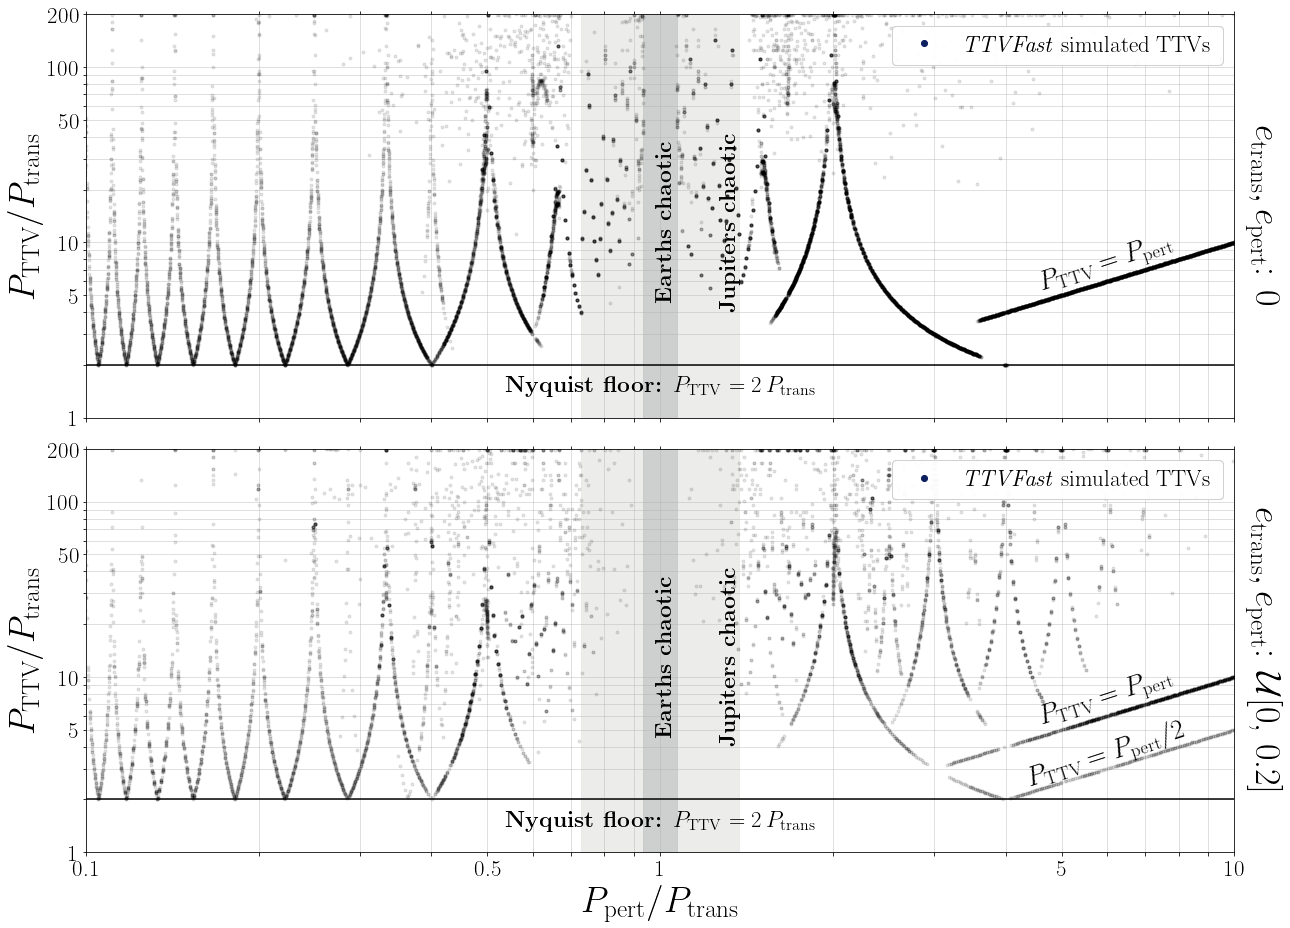

In [126]:
import matplotlib.lines as mlines

# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]



# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=[18, 13], sharex=True)

# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0,1):  # Adjust range to loop through the first 1 rows only
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = axs[0].plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.1, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs')

# Repeat the above process for all rows in the second subplot
combined_ppert_over_ptrans = []
combined_P1ttv = []



    
# plot Nyquist floor
axs[0].axhline(2, 0, 1, color='k')
axs[0].text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



ecc_label = r'$e_\mathrm{trans}, e_\mathrm{pert}$: 0'
axs[0].annotate(ecc_label, xy=(1.01, 0.5), xycoords='axes fraction', fontsize=36, ha='left', va='center', rotation=270)










# Subplot 2: Loop through a range of rows (e.g., first 2 rows)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(1,2):  # Adjust range to loop through the first 2 rows only
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = axs[1].plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.1, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs')

# Repeat the above process for all rows in the second subplot
combined_ppert_over_ptrans = []
combined_P1ttv = []



    
# plot Nyquist floor
axs[1].axhline(2, 0, 1, color='k')
axs[1].text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')


ecc_label = r'$e_\mathrm{trans}, e_\mathrm{pert}$: $\mathcal{U}$[0, 0.2]'
axs[1].annotate(ecc_label, xy=(1.01, 0.5), xycoords='axes fraction', fontsize=36, ha='left', va='center', rotation=270)








#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
axs[0].fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
axs[0].fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
axs[1].fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
axs[1].fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
axs[0].text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
axs[0].text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
axs[1].text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
axs[1].text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)




axs[0].text(6, 7.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=18, color='k', ha='center', va='center')
axs[1].text(6, 7.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=18, color='k', ha='center', va='center')
axs[1].text(6, 3.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}/2$', fontsize=27, rotation=18, color='k', ha='center', va='center')




    
    
    
    
# Set plot properties for both subplots
for ax in axs:
    ax.set_yscale("log", base=10)
    ax.set_xscale("log", base=10)
    ax.set_xlim(.1, 10)
    ax.set_ylim(1, 200)
    ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
                   1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                        1, '', '', '', 5, '', '', '', '', 10])
    ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
                   10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
    ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                        10, '', '', '', 50, '', '', '', '', 100, 200])
    ax.tick_params(axis='x', which='both', bottom=True, top=True)
    ax.tick_params(axis='y', which='both', bottom=True, top=True)

    ax.grid(True, alpha=0.5)

axs[0].set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)
axs[1].set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)
axs[1].set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize=36)



# Custom proxy artist for the legend with alpha=1
ttvfast_legend_marker = mlines.Line2D([], [], color='#0e1f60', marker='o', linestyle='', alpha=1, label=r'\textit{TTVFast} simulated TTVs')

# Add the legend to top subplot
lines = [ttvfast_legend_marker]
labs = [line.get_label() for line in lines]
legend = axs[0].legend(lines, labs, fontsize=23, loc=1)
axs[0].add_artist(legend)

# Add the legend to middle subplot
lines = [ttvfast_legend_marker]
labs = [line.get_label() for line in lines]
legend = axs[1].legend(lines, labs, fontsize=23, loc=1)
axs[1].add_artist(legend)


fig.tight_layout()

# Optionally save the figure
plt.savefig('./figures/orbital_landscape_combined.pdf', bbox_inches='tight')

# Show the plot
plt.show()


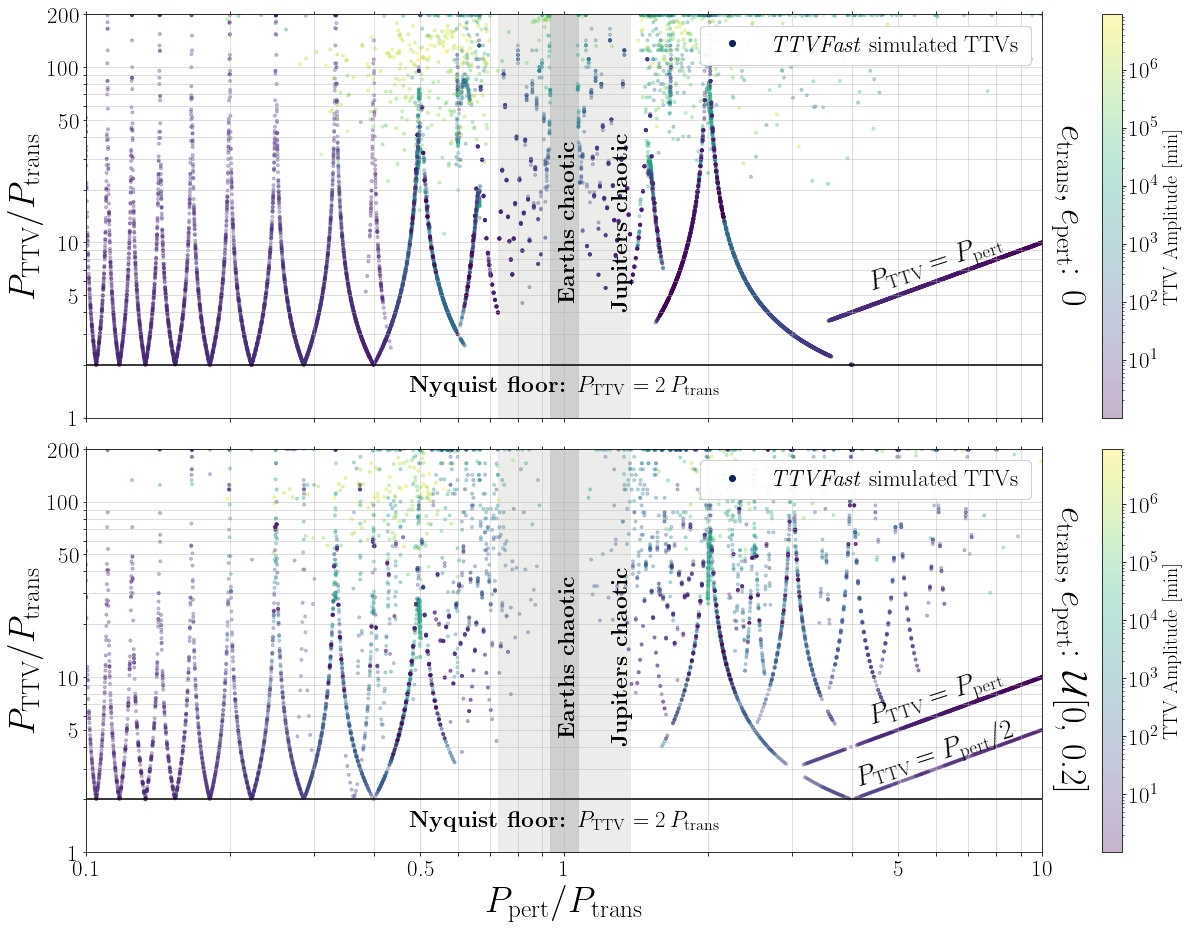

In [127]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]

# Initialize lists to store combined filtered data
combined_ppert_over_ptrans_0 = []
combined_P1ttv_0 = []
combined_amplitude_ttv_0 = []

combined_ppert_over_ptrans_1 = []
combined_P1ttv_1 = []
combined_amplitude_ttv_1 = []

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=[18, 13], sharex=True)

# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0, 1):
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]
                    combined_ppert_over_ptrans_0.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv_0.extend(P1ttv[selected_indices])
                    combined_amplitude_ttv_0.extend(amp_ttv[selected_indices])

combined_ppert_over_ptrans_0 = np.array(combined_ppert_over_ptrans_0)
combined_P1ttv_0 = np.array(combined_P1ttv_0)
combined_amplitude_ttv_0 = np.array(combined_amplitude_ttv_0)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans_0.size > 0 and combined_P1ttv_0.size > 0:
    sc0 = axs[0].scatter(
        combined_ppert_over_ptrans_0, combined_P1ttv_0,
        c=combined_amplitude_ttv_0,
        marker='.',
        cmap='viridis',
        norm=LogNorm(vmin=combined_amplitude_ttv_0.min(), vmax=combined_amplitude_ttv_0.max()),
        alpha=0.3
    )
    cbar0 = fig.colorbar(sc0, ax=axs[0])
    cbar0.set_label(r'TTV Amplitude [min]', fontsize=20)

# plot Nyquist floor
axs[0].axhline(2, 0, 1, color='k')
axs[0].text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')
ecc_label = r'$e_\mathrm{trans}, e_\mathrm{pert}$: 0'
axs[0].annotate(ecc_label, xy=(1.01, 0.5), xycoords='axes fraction', fontsize=36, ha='left', va='center', rotation=270)


# Subplot 2: Loop through a range of rows (e.g., first 2 rows)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(1, 2):
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]
                    combined_ppert_over_ptrans_1.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv_1.extend(P1ttv[selected_indices])
                    combined_amplitude_ttv_1.extend(amp_ttv[selected_indices])

combined_ppert_over_ptrans_1 = np.array(combined_ppert_over_ptrans_1)
combined_P1ttv_1 = np.array(combined_P1ttv_1)
combined_amplitude_ttv_1 = np.array(combined_amplitude_ttv_1)

# Plot the combined filtered data in the second subplot
if combined_ppert_over_ptrans_1.size > 0 and combined_P1ttv_1.size > 0:
    sc1 = axs[1].scatter(
        combined_ppert_over_ptrans_1, combined_P1ttv_1,
        c=combined_amplitude_ttv_1,
        marker='.',
        cmap='viridis',
        norm=LogNorm(vmin=combined_amplitude_ttv_1.min(), vmax=combined_amplitude_ttv_1.max()),
        alpha=0.3
    )
    cbar1 = fig.colorbar(sc1, ax=axs[1])
    cbar1.set_label(r'TTV Amplitude [min]', fontsize=20)

# plot Nyquist floor
axs[1].axhline(2, 0, 1, color='k')
axs[1].text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')
ecc_label = r'$e_\mathrm{trans}, e_\mathrm{pert}$: $\mathcal{U}$[0, 0.2]'
axs[1].annotate(ecc_label, xy=(1.01, 0.5), xycoords='axes fraction', fontsize=36, ha='left', va='center', rotation=270)

#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
for ax in axs:
    ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7, zorder=-10000)
    ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7, zorder=-10000)

# Add vertical labels inside the shaded regions
for ax in axs:
    ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
    ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

# Diagonal labels
axs[0].text(6, 7.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=18, color='k', ha='center', va='center')
axs[1].text(6, 7.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=18, color='k', ha='center', va='center')
axs[1].text(6, 3.6, r'$P_\mathrm{TTV} = P_\mathrm{pert}/2$', fontsize=27, rotation=18, color='k', ha='center', va='center')

# Set plot properties for both subplots
for ax in axs:
    ax.set_yscale("log", base=10)
    ax.set_xscale("log", base=10)
    ax.set_xlim(.1, 10)
    ax.set_ylim(1, 200)
    ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 1, '', '', '', 5, '', '', '', '', 10])
    ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
    ax.set_yticklabels([1, '', '', '', 5, '', '', '', '', 10, '', '', '', 50, '', '', '', '', 100, 200])
    ax.tick_params(axis='x', which='both', bottom=True, top=True)
    ax.tick_params(axis='y', which='both', bottom=True, top=True)
    ax.grid(True, alpha=0.5)

axs[0].set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)
axs[1].set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)
axs[1].set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize=36)

# Custom proxy artist for the legend
ttvfast_legend_marker = mlines.Line2D([], [], color='#0e1f60', marker='o', linestyle='', alpha=1, label=r'\textit{TTVFast} simulated TTVs')
for ax in axs:
    legend = ax.legend([ttvfast_legend_marker], [ttvfast_legend_marker.get_label()], fontsize=23, loc=1)
    ax.add_artist(legend)

fig.tight_layout()
plt.savefig('./figures/orbital_landscape_combined_amplitude.pdf', bbox_inches='tight')
plt.show()



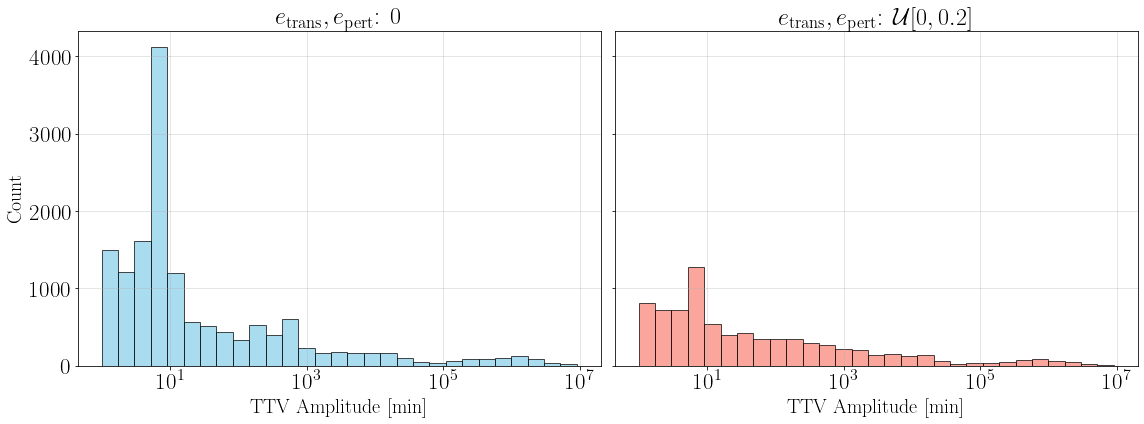

In [128]:
import matplotlib.pyplot as plt

# Convert to numpy arrays if not already
amplitudes_0 = np.array(combined_amplitude_ttv_0)
amplitudes_1 = np.array(combined_amplitude_ttv_1)

# Set up logarithmic bins
bins = np.logspace(np.log10(1), np.log10(np.max([amplitudes_0.max(), amplitudes_1.max()])), 30)

# Create figure for log-scale histograms
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# First subplot: e_trans, e_pert = 0
axs[0].hist(amplitudes_0, bins=bins, color='skyblue', edgecolor='k', alpha=0.7)
axs[0].set_xscale('log')
axs[0].set_xlabel('TTV Amplitude [min]', fontsize=20)
axs[0].set_ylabel('Count', fontsize=20)
axs[0].set_title(r'$e_\mathrm{trans}, e_\mathrm{pert}$: 0', fontsize=24)
axs[0].grid(alpha=0.4, which='both')

# Second subplot: e_trans, e_pert ~ U[0,0.2]
axs[1].hist(amplitudes_1, bins=bins, color='salmon', edgecolor='k', alpha=0.7)
axs[1].set_xscale('log')
axs[1].set_xlabel('TTV Amplitude [min]', fontsize=20)
axs[1].set_title(r'$e_\mathrm{trans}, e_\mathrm{pert}$: $\mathcal{U}[0, 0.2]$', fontsize=24)
axs[1].grid(alpha=0.4, which='both')

plt.tight_layout()
plt.show()


In [129]:
# For subplot 1 (e_trans, e_pert = 0)
perc_0 = np.sum(amplitudes_0 < 10000) / len(amplitudes_0) * 100

# For subplot 2 (e_trans, e_pert ~ U[0, 0.2])
perc_1 = np.sum(amplitudes_1 < 10000) / len(amplitudes_1) * 100

print(f"Percentage of amplitudes < 100 min (e=0): {perc_0:.2f}%")
print(f"Percentage of amplitudes < 100 min (e~U[0,0.2]): {perc_1:.2f}%")

Percentage of amplitudes < 100 min (e=0): 93.41%
Percentage of amplitudes < 100 min (e~U[0,0.2]): 91.79%


## now combine!

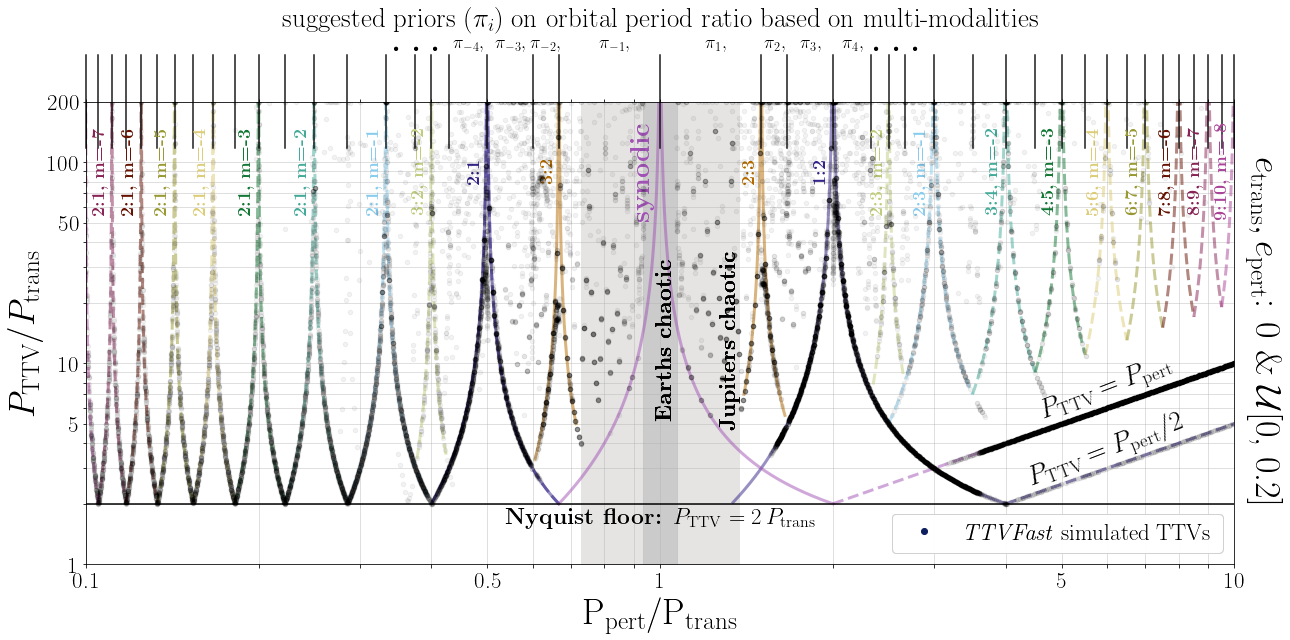

In [135]:
import matplotlib.lines as mlines

# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]



# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []

# Create a figure with two subplots
fig, ax = plt.subplots(1, figsize=[18, 9], sharex=True)

# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0,2):  # both eccentricities
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 60/60 -- or 1 min
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = ax.plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.05, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs', zorder=10000, ms=9)




ecc_label = r'$e_\mathrm{trans}, e_\mathrm{pert}$: 0 \& $\mathcal{U}$[0, 0.2]'
ax.annotate(ecc_label, xy=(1.01, 0.5), xycoords='axes fraction', fontsize=36, ha='left', va='center', rotation=270)

















#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)





#plot analytic TTV perids




count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1


legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)



#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )

    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--', alpha=0.5)

    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1




#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2', alpha=0.5)

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2', alpha=0.5)


# Plot the analytic super periods oouter


# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)

    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m), alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1





#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--', alpha=0.5)

    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3', alpha=0.5)
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', alpha=0.5)
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-', alpha=0.5)

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)

    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--', alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{'+str(k-1)+':'+str(k)+', m=-'+str(k-2)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{2:3, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{2:1, m=-'+str(ii)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{3:2, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)







#check that the values in the paper are correct       
values_as_numbers = [
    0.1,
    0.10526315789473684,
    0.1111111111111111,
    0.11764705882352941,
    0.125,
    0.13333333333333333,
    0.14285714285714285,
    0.15384615384615385,
    0.16666666666666666,
    0.18181818181818182,
    0.2,
    0.2222222222222222,
    0.25,
    0.2857142857142857,
    0.3333333333333333,
    0.375,
    0.4,
    0.42857142857142855,
    0.5,
    0.6,
    0.6666666666666666,
    1.0,
    1.5,
    1.6666666666666667,
    2.0,
    2.3333333333333335,
    2.5,
    2.6666666666666665,
    3.0,
    3.5,
    4.0,
    4.5,
    5.0,
    5.5,
    6.0,
    6.5,
    7.0,
    7.5,
    8.0,
    8.5,
    9.0,
    9.5,
    10.0
]

i = -21
for ii in range(0, len(values_as_numbers)):
    per=values_as_numbers[ii]
    ax.axvline(per, .9, 1.1, color='k', alpha=.9, clip_on=False)
    if i > -5:
        if i < 5:
            ax.text((values_as_numbers[ii]+values_as_numbers[ii+1])/2, 390, 
                    r' $\pi_{'+str(i)+'}, $',clip_on=False, fontsize=18,
                    horizontalalignment='center', verticalalignment='center')
            
    if i !=-1:
        i += 1
    else:
        i += 2

ax.text(.38, 410, r'$.\,.\,.$',clip_on=False, fontsize=45,
        horizontalalignment='center', verticalalignment='center')
ax.text(2.6, 410, r'$.\,.\,.$',clip_on=False, fontsize=45,
        horizontalalignment='center', verticalalignment='center')



ax.text(6, 7.5, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=21, color='k', ha='center', va='center')
ax.text(6, 3.7, r'$P_\mathrm{TTV} = P_\mathrm{pert}/2$', fontsize=27, rotation=21, color='k', ha='center', va='center')

    
#add title labeling the prior ranges 
plt.title(r"suggested priors ($\pi_i$) on orbital period ratio based on multi-modalities", pad=75, fontsize=27)

    

# Set plot properties
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)



# Custom proxy artist for the legend with alpha=1
ttvfast_legend_marker = mlines.Line2D([], [], color='#0e1f60', marker='o', linestyle='', alpha=1, label=r'\textit{TTVFast} simulated TTVs')

# Add the legend to top subplot
lines = [ttvfast_legend_marker]
labs = [line.get_label() for line in lines]
legend = ax.legend(lines, labs, fontsize=23, loc=4)
ax.add_artist(legend)


fig.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape.pdf')



plt.show()

In [36]:
# --- FULL CONSISTENCY CHECK ---

# Define tolerance: e.g., 10% fractional difference allowed

tolerance_fraction = 0.1

# Precompute all analytic curves

analytic_curves = []

# 2:1 resonance
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 1)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 2:1
m = 0
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 2, 1), m)
    analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))
    m -= 1

# 3:2 resonance
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 3:2
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 3, 2), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# 1:2 resonance (outer)
p2p1_analytic = np.arange(1.34, 4, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 1, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 1:2
p2p1_alias_range_analytic = np.arange(4, 10, .0001)
pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 1, 2), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))

# Higher-order aliases: 2:3, 3:4, ..., 9:10
for k in range(3, 11):
    p2p1_analytic = np.arange(k - 0.5, k + 0.5, .0001)
    j_analytic = k - 1
    pttv_analytic = alias_period(super_period_norm(p2p1_analytic, j_analytic, k), -(k - 2))
    analytic_curves.append((p2p1_analytic, pttv_analytic))

# 2:3 resonance
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 4:5
p2p1_analytic = np.arange(5/2 - .15, 5/2 + .15, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 4, 5), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased synodic
p2p1_alias_range_analytic = np.arange(2, 10, .0001)
pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))


# ---- Do the consistency check ----

consistent_count = 0

for p_numerical, P1ttv_numerical in zip(combined_ppert_over_ptrans, combined_P1ttv):

    consistent = False

    for p_analytic_array, P1ttv_analytic_array in analytic_curves:

        # Skip if numerical period ratio outside analytic curve range
        if p_numerical < p_analytic_array[0] or p_numerical > p_analytic_array[-1]:
            continue

        # Find nearest analytic point in ppert/ptrans
        idx = np.argmin(np.abs(p_analytic_array - p_numerical))
        P1ttv_analytic = P1ttv_analytic_array[idx]

        # Check consistency within tolerance
        if np.abs(P1ttv_numerical - P1ttv_analytic) < tolerance_fraction * P1ttv_analytic:
            consistent = True
            break  # no need to check other curves

    if consistent:
        consistent_count += 1

# Compute consistency fraction
total_points = len(combined_ppert_over_ptrans)
consistency_fraction = consistent_count / total_points

print(f"Fraction of consistent numerical simulations: {consistency_fraction:.3f}")



Fraction of consistent numerical simulations: 0.747


In [37]:
# --- FULL CONSISTENCY CHECK (restricted version: ppert/ptrans < 0.5 or > 2) ---

# Define tolerance: e.g., 10% fractional difference allowed
tolerance_fraction = 0.1

# Precompute all analytic curves

analytic_curves = []

# 2:1 resonance
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 1)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 2:1
m = 0
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 2, 1), m)
    analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))
    m -= 1

# 3:2 resonance
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 3:2
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 3, 2), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# 1:2 resonance (outer)
p2p1_analytic = np.arange(1.34, 4, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 1, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 1:2
p2p1_alias_range_analytic = np.arange(4, 10, .0001)
pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 1, 2), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))

# Higher-order aliases: 2:3, 3:4, ..., 9:10
for k in range(3, 11):
    p2p1_analytic = np.arange(k - 0.5, k + 0.5, .0001)
    j_analytic = k - 1
    pttv_analytic = alias_period(super_period_norm(p2p1_analytic, j_analytic, k), -(k - 2))
    analytic_curves.append((p2p1_analytic, pttv_analytic))

# 2:3 resonance
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 4:5
p2p1_analytic = np.arange(5/2 - .15, 5/2 + .15, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 4, 5), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased synodic
p2p1_alias_range_analytic = np.arange(2, 10, .0001)
pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))


# ---- Do the restricted consistency check ----

consistent_count = 0
restricted_total = 0

for p_numerical, P1ttv_numerical in zip(combined_ppert_over_ptrans, combined_P1ttv):

    # Apply period ratio restriction:
    if not (p_numerical < 0.5 or p_numerical > 2):
        continue

    restricted_total += 1

    consistent = False

    for p_analytic_array, P1ttv_analytic_array in analytic_curves:

        # Skip if numerical period ratio outside analytic curve range
        if p_numerical < p_analytic_array[0] or p_numerical > p_analytic_array[-1]:
            continue

        # Find nearest analytic point in ppert/ptrans
        idx = np.argmin(np.abs(p_analytic_array - p_numerical))
        P1ttv_analytic = P1ttv_analytic_array[idx]

        # Check consistency within tolerance
        if np.abs(P1ttv_numerical - P1ttv_analytic) < tolerance_fraction * P1ttv_analytic:
            consistent = True
            break

    if consistent:
        consistent_count += 1

# Compute restricted consistency fraction
if restricted_total > 0:
    consistency_fraction = consistent_count / restricted_total
    print(f"Fraction of consistent numerical simulations (restricted): {consistency_fraction:.3f}")
else:
    print("No data points found in the restricted period ratio range.")


Fraction of consistent numerical simulations (restricted): 0.831


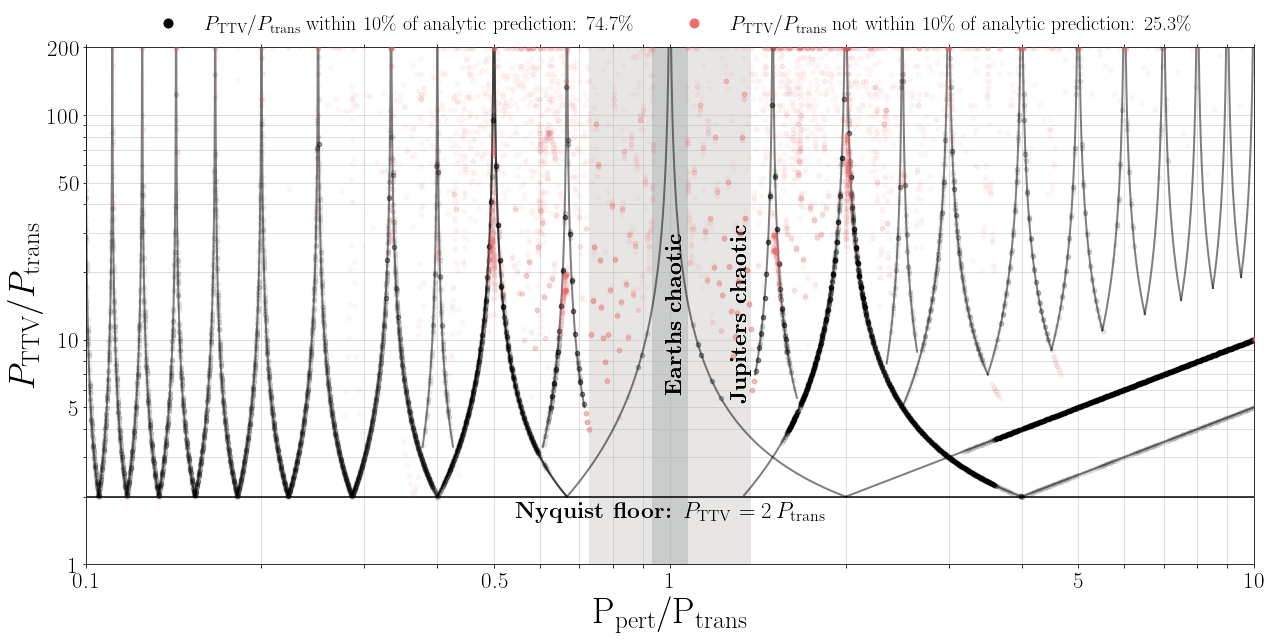

In [38]:
# Diagnostic plot: analytic curves + consistent and inconsistent numerical points

# First: generate all analytic curves (same as before)

analytic_curves = []

# 2:1 resonance
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 1)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 2:1
m = 0
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 2, 1), m)
    analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))
    m -= 1

# 3:2 resonance
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 3:2
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 3, 2), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# 1:2 resonance
p2p1_analytic = np.arange(1.34, 4, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 1, 2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 1:2
p2p1_alias_range_analytic = np.arange(4, 10, .0001)
pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, 1, 2), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))

# Higher-order aliases: 2:3, 3:4, ..., 9:10
for k in range(3, 11):
    p2p1_analytic = np.arange(k - 0.5, k + 0.5, .0001)
    j_analytic = k - 1
    pttv_analytic = alias_period(super_period_norm(p2p1_analytic, j_analytic, k), -(k - 2))
    analytic_curves.append((p2p1_analytic, pttv_analytic))

# 2:3 resonance
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased 4:5
p2p1_analytic = np.arange(5/2 - .15, 5/2 + .15, .0001)
pttv_analytic = alias_period(super_period_norm(p2p1_analytic, 4, 5), -2)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
analytic_curves.append((p2p1_analytic, pttv_analytic))

# Aliased synodic
p2p1_alias_range_analytic = np.arange(2, 10, .0001)
pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), -1)
analytic_curves.append((p2p1_alias_range_analytic, pttv_alias_range_analytic))

# -------------------------------------------------
# Consistency check loop
tolerance_fraction = .1

consistent_x = []
consistent_y = []
inconsistent_x = []
inconsistent_y = []

for p_numerical, P1ttv_numerical in zip(combined_ppert_over_ptrans, combined_P1ttv):

    consistent = False

    for p_analytic_array, P1ttv_analytic_array in analytic_curves:

        if p_numerical < p_analytic_array[0] or p_numerical > p_analytic_array[-1]:
            continue

        idx = np.argmin(np.abs(p_analytic_array - p_numerical))
        P1ttv_analytic = P1ttv_analytic_array[idx]

        if np.abs(P1ttv_numerical - P1ttv_analytic) < tolerance_fraction * P1ttv_analytic:
            consistent = True
            break

    if consistent:
        consistent_x.append(p_numerical)
        consistent_y.append(P1ttv_numerical)
    else:
        inconsistent_x.append(p_numerical)
        inconsistent_y.append(P1ttv_numerical)


# -------------------------------------------------
# Compute consistency fraction before plotting
total_points = len(consistent_x) + len(inconsistent_x)
consistency_fraction = len(consistent_x) / total_points * 100

# Now make the diagnostic plot

fig, ax = plt.subplots(1, figsize=[18, 9])

# Plot all analytic curves in grey
for p_analytic_array, P1ttv_analytic_array in analytic_curves:
    ax.plot(p_analytic_array, P1ttv_analytic_array, color='black', lw=2, alpha=0.5)

# Plot consistent numerical points in black
ax.plot(consistent_x, consistent_y, color='black', 
        ls='', marker='.', ms=9, zorder=10, alpha=.05)

# Plot inconsistent numerical points in red
ax.plot(inconsistent_x, inconsistent_y, color='#ee6b6e', 
        ls='', marker='.', ms=9, zorder=10, alpha=.05)


# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)




# Set plot properties (unchanged)
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)

# legend
consistent_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='', markersize=9, 
    label=fr'$P_\mathrm{{TTV}}/P_\mathrm{{trans}}$ within {tolerance_fraction*100:.0f}\%  of analytic prediction: {consistency_fraction:.1f}\%')

inconsistent_marker = mlines.Line2D([], [], color='#ee6b6e', marker='o', linestyle='', markersize=9, 
    label=fr'$P_\mathrm{{TTV}}/P_\mathrm{{trans}}$ not within {tolerance_fraction*100:.0f}\% of analytic prediction: {100-consistency_fraction:.1f}\%')

# Add legend with proxy artists
ax.legend(handles=[consistent_marker, inconsistent_marker], fontsize=20,
          loc='lower center',
          bbox_to_anchor=(0.5, .99),
          ncol=3,
          frameon=False)


plt.tight_layout()


plt.savefig('./figures/analytic_numerical_landscape_comp.pdf')
plt.show()


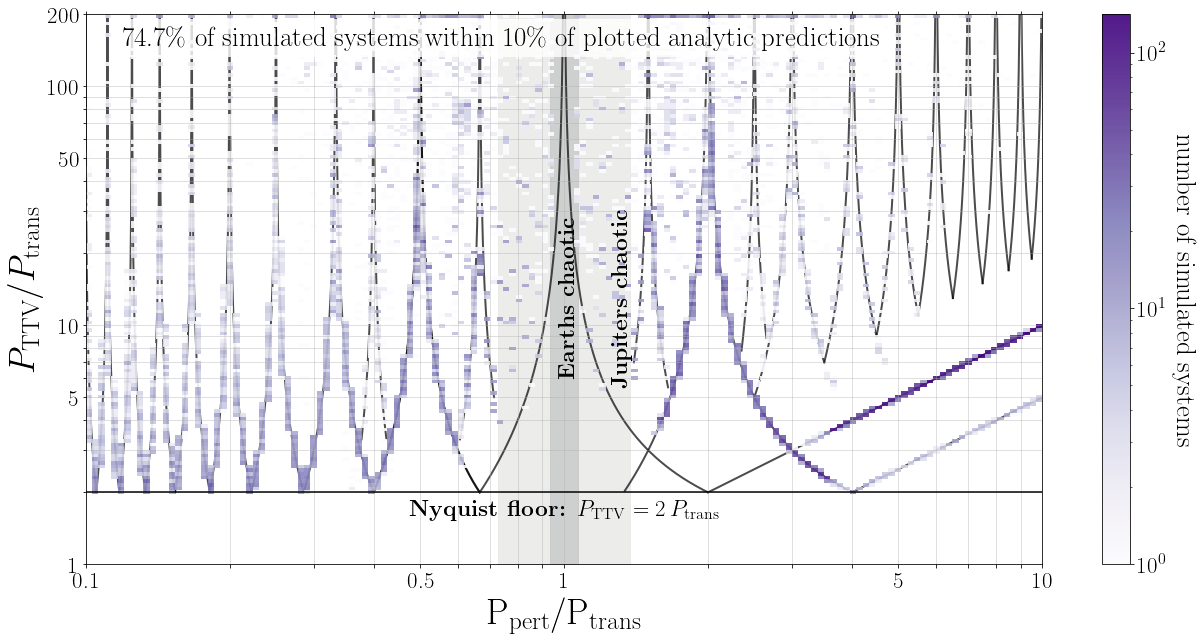

In [89]:
# ==============================
# 2D pixelized histogram + analytic curves
# ==============================
from matplotlib import colors
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, figsize=[18, 9])

# -------------------------------------------------
# Build 2D histogram of ALL numerical points
# -------------------------------------------------
# Combine consistent and inconsistent points
x_all = np.array(consistent_x + inconsistent_x)
y_all = np.array(consistent_y + inconsistent_y)

# Define log-spaced bins that match your axis ranges
x_bins = np.logspace(np.log10(0.1), np.log10(10), 150)   # P_pert / P_trans
y_bins = np.logspace(np.log10(1),   np.log10(200), 150)  # P_TTV / P_trans

# 2D histogram, log-normalized so dense regions pop out
H, xedges, yedges, img = ax.hist2d(
    x_all,
    y_all,
    bins=[x_bins, y_bins],
    norm=colors.LogNorm(),
    cmap='Purples',
    alpha=.9,
    zorder=1
)

# Optional: colorbar for density
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('number of simulated systems', fontsize=27, rotation=270, labelpad=30)

# -------------------------------------------------
# Plot all analytic curves on top
# -------------------------------------------------
for p_analytic_array, P1ttv_analytic_array in analytic_curves:
    ax.plot(p_analytic_array, P1ttv_analytic_array, color='black', lw=2, alpha=0.7, zorder=-5)

# -------------------------------------------------
# Nyquist floor
# -------------------------------------------------
ax.axhline(2, 0, 1, color='k', zorder=6)
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}',
        fontsize=23, ha='center', color='k')

# -------------------------------------------------
# Chaotic regions (Deck+2013)
# -------------------------------------------------
jup_ratio   = 1 + 2.2 * (2 * 1e-3)**(2/7)
earth_ratio = 1 + 2.2 * (2 * 3e-6)**(2/7)

ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7, zorder=-10)  # Earth-mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio,   jup_ratio,   color='#E5E4E2', alpha=.7, zorder=-10)  # Jupiter-mass chaotic region

# Add vertical labels inside the shaded regions
ax.text(earth_ratio - .05, 13, r'\textbf{Earths chaotic}', color='black',
        fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio - .05, 13, r'\textbf{Jupiters chaotic}', color='black',
        fontsize=23, ha='center', va='center', rotation=90)

# -------------------------------------------------
# Axes, ticks, grid
# -------------------------------------------------
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)

ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9,
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '',
                    1, '', '', '', 5, '', '', '', '', 10])

ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])

ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize=36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)

# -------------------------------------------------
# Consistency annotation instead of legend
# -------------------------------------------------
ax.text(
    0.12, 180,
    fr'{consistency_fraction:.1f}\% of simulated systems within 10\% of plotted analytic predictions',
    fontsize=27,
    color='black',
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=6)
)



plt.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape_comp_2dhist.pdf')
plt.show()


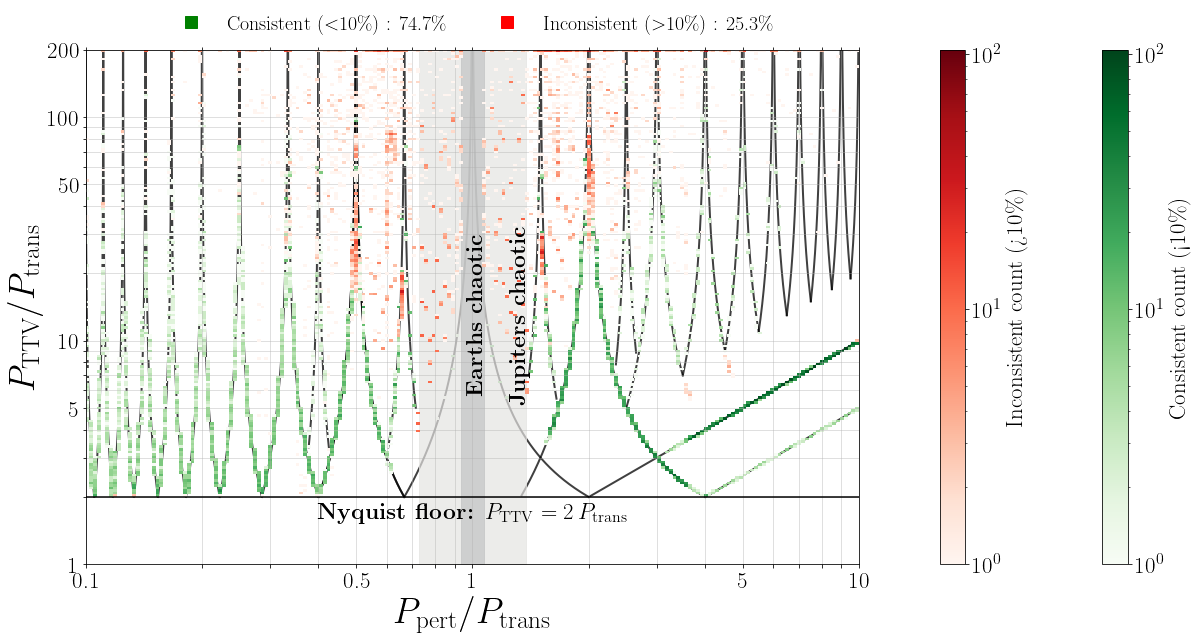

In [47]:
# ================================================
# 2D pixel histograms: consistent vs inconsistent, same norm, TeX-safe labels
# ================================================
from matplotlib import colors
import matplotlib.lines as mlines

fig, ax = plt.subplots(1, figsize=[18, 9])

# -------------------------------------------------
# Convert to arrays
# -------------------------------------------------
x_cons = np.array(consistent_x)
y_cons = np.array(consistent_y)
x_incons = np.array(inconsistent_x)
y_incons = np.array(inconsistent_y)

# -------------------------------------------------
# Define log-spaced bins matching axes
# -------------------------------------------------
x_bins = np.logspace(np.log10(0.1), np.log10(10), 200)
y_bins = np.logspace(np.log10(1),   np.log10(200), 200)

# -------------------------------------------------
# First compute histograms WITHOUT plotting
# -------------------------------------------------
Hc, _, _ = np.histogram2d(x_cons,   y_cons,   bins=[x_bins, y_bins])
Hi, _, _ = np.histogram2d(x_incons, y_incons, bins=[x_bins, y_bins])

# Avoid zero max just in case
global_max = max(Hc.max(), Hi.max(), 1)
norm = colors.LogNorm(vmin=1, vmax=global_max)

# -------------------------------------------------
# Now plot the two 2D histograms with identical norm
# -------------------------------------------------

# Consistent — green
Hc_plot = ax.hist2d(
    x_cons, y_cons,
    bins=[x_bins, y_bins],
    norm=norm,
    cmap='Greens',
    alpha=1,
    zorder=1
)

# Inconsistent — red
Hi_plot = ax.hist2d(
    x_incons, y_incons,
    bins=[x_bins, y_bins],
    norm=norm,
    cmap='Reds',
    alpha=1,
    zorder=2
)

# -------------------------------------------------
# Colorbars (plain TeX-safe labels)
# -------------------------------------------------
cbar_c = plt.colorbar(Hc_plot[3], ax=ax, pad=0.01)
cbar_i = plt.colorbar(Hi_plot[3], ax=ax, pad=0.08)

cbar_c.set_label(r'Consistent count (<10\%)', fontsize=23)
cbar_i.set_label(r'Inconsistent count (>10\%)', fontsize=23)

# -------------------------------------------------
# Plot analytic curves on top
# -------------------------------------------------
for p_analytic_array, P1ttv_analytic_array in analytic_curves:
    ax.plot(
        p_analytic_array, P1ttv_analytic_array,
        color='black', lw=2, alpha=0.75, zorder=-5
    )

# -------------------------------------------------
# Nyquist floor
# (this form worked in your original code)
# -------------------------------------------------
ax.axhline(2, 0, 1, color='k', zorder=6)
ax.text(
    1, 1.6,
    r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}',
    fontsize=23, ha='center', color='k'
)

# -------------------------------------------------
# Chaotic zones (Deck+2013)
# -------------------------------------------------
jup_ratio   = 1 + 2.2 * (2 * 1e-3)**(2/7)
earth_ratio = 1 + 2.2 * (2 * 3e-6)**(2/7)

ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio,
                 color='#71797E', alpha=.7)
ax.fill_betweenx([1, 200], 1/jup_ratio,   jup_ratio,
                 color='#E5E4E2', alpha=.7)

ax.text(
    earth_ratio - .05, 13, 
    r'\textbf{Earths chaotic}', fontsize=23,
    ha='center', va='center', rotation=90
)
ax.text(
    jup_ratio - .05, 13, 
    r'\textbf{Jupiters chaotic}', fontsize=23,
    ha='center', va='center', rotation=90
)

# -------------------------------------------------
# Axes, ticks, grid
# -------------------------------------------------
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)

ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9,
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '',
                    1, '', '', '', 5, '', '', '', '', 10])

ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])

ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)
ax.grid(True, alpha=0.5)

ax.set_xlabel(r'$P_\mathrm{pert} / P_\mathrm{trans}$', fontsize=36)
ax.set_ylabel(r'$P_\mathrm{TTV} / P_\mathrm{trans}$', fontsize=36)


# -------------------------------------------------
# Legend (percentages only, TeX-safe)
# -------------------------------------------------
consistent_label   = fr'Consistent ($<${tolerance_fraction*100:.0f}\%) : {consistency_fraction:.1f}\%'
inconsistent_label = fr'Inconsistent ($>${tolerance_fraction*100:.0f}\%) : {100-consistency_fraction:.1f}\%'

consistent_marker = mlines.Line2D(
    [], [], color='green', marker='s', linestyle='', markersize=12,
    label=consistent_label
)

inconsistent_marker = mlines.Line2D(
    [], [], color='red', marker='s', linestyle='', markersize=12,
    label=inconsistent_label
)

ax.legend(
    handles=[consistent_marker, inconsistent_marker],
    fontsize=20,
    loc='lower center',
    bbox_to_anchor=(0.5, .995),
    ncol=2,
    frameon=False
)

plt.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape_comp_2dhist_split_same_norm.pdf')
plt.show()




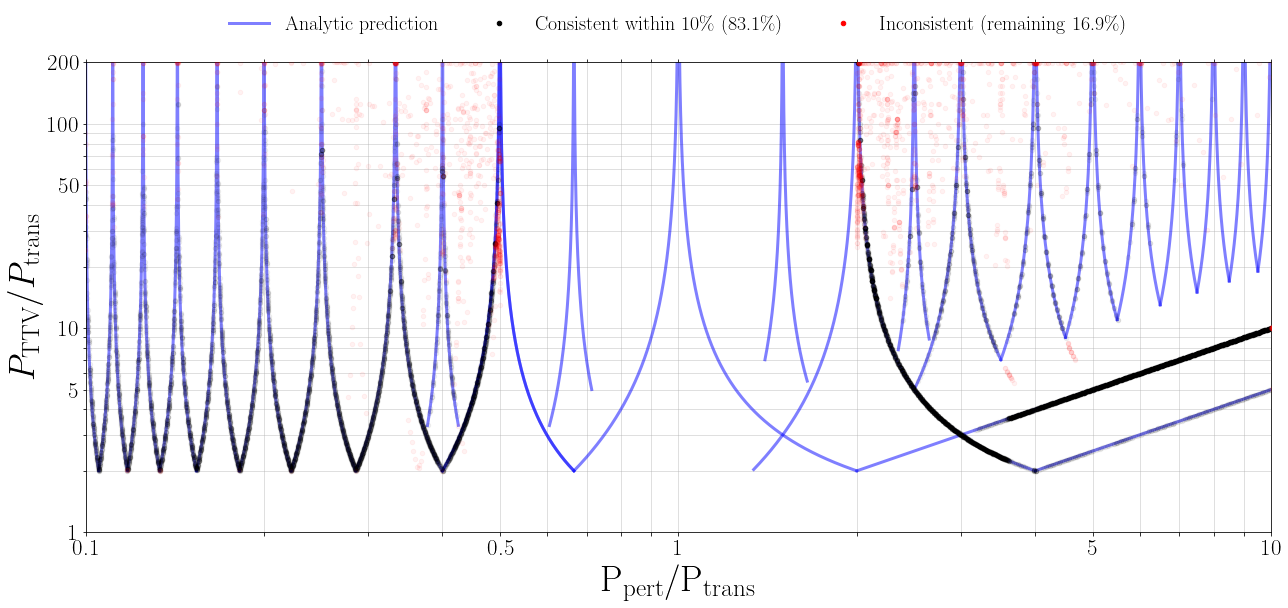

In [140]:
# -------------------------------------------------
# Apply period ratio filter
p_filter = (np.array(combined_ppert_over_ptrans) < 0.5) | (np.array(combined_ppert_over_ptrans) > 2)

# Filtered numerical data
filtered_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)[p_filter]
filtered_P1ttv = np.array(combined_P1ttv)[p_filter]

# -------------------------------------------------
# Consistency check loop

tolerance_fraction = 0.1

consistent_x = []
consistent_y = []
inconsistent_x = []
inconsistent_y = []

for p_numerical, P1ttv_numerical in zip(filtered_ppert_over_ptrans, filtered_P1ttv):

    consistent = False

    for p_analytic_array, P1ttv_analytic_array in analytic_curves:

        if p_numerical < p_analytic_array[0] or p_numerical > p_analytic_array[-1]:
            continue

        idx = np.argmin(np.abs(p_analytic_array - p_numerical))
        P1ttv_analytic = P1ttv_analytic_array[idx]

        if np.abs(P1ttv_numerical - P1ttv_analytic) < tolerance_fraction * P1ttv_analytic:
            consistent = True
            break

    if consistent:
        consistent_x.append(p_numerical)
        consistent_y.append(P1ttv_numerical)
    else:
        inconsistent_x.append(p_numerical)
        inconsistent_y.append(P1ttv_numerical)

# -------------------------------------------------
# Compute consistency fraction
total_points = len(consistent_x) + len(inconsistent_x)
consistency_fraction = len(consistent_x) / total_points * 100
tolerance_percent = tolerance_fraction * 100

# -------------------------------------------------
# Now make the diagnostic plot

fig, ax = plt.subplots(1, figsize=[18, 9])

# Plot all analytic curves in blue
for p_analytic_array, P1ttv_analytic_array in analytic_curves:
    ax.plot(p_analytic_array, P1ttv_analytic_array, color='blue', lw=3, alpha=0.5)

# Plot consistent numerical points in black
ax.plot(consistent_x, consistent_y, color='black', ls='', marker='.', ms=9, zorder=10, alpha=.05)

# Plot inconsistent numerical points in red
ax.plot(inconsistent_x, inconsistent_y, color='red', ls='', marker='.', ms=9, zorder=10, alpha=.05)

# -------------------------------------------------
# Proxy artists for legend
import matplotlib.lines as mlines

analytic_line = mlines.Line2D([], [], color='blue', lw=3, alpha=0.5, label='Analytic prediction')

consistent_marker = mlines.Line2D([], [], color='black', marker='.', linestyle='', markersize=9, 
    label=fr'Consistent within {tolerance_percent:.0f}\% ({consistency_fraction:.1f}\%)')

inconsistent_marker = mlines.Line2D([], [], color='red', marker='.', linestyle='', markersize=9, 
    label=fr'Inconsistent (remaining {100-consistency_fraction:.1f}\%)')

# Centered legend at top
ax.legend(handles=[analytic_line, consistent_marker, inconsistent_marker],
          fontsize=20,
          loc='lower center',
          bbox_to_anchor=(0.5, 1.02),
          ncol=3,
          frameon=False)

# -------------------------------------------------
# Plot formatting

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


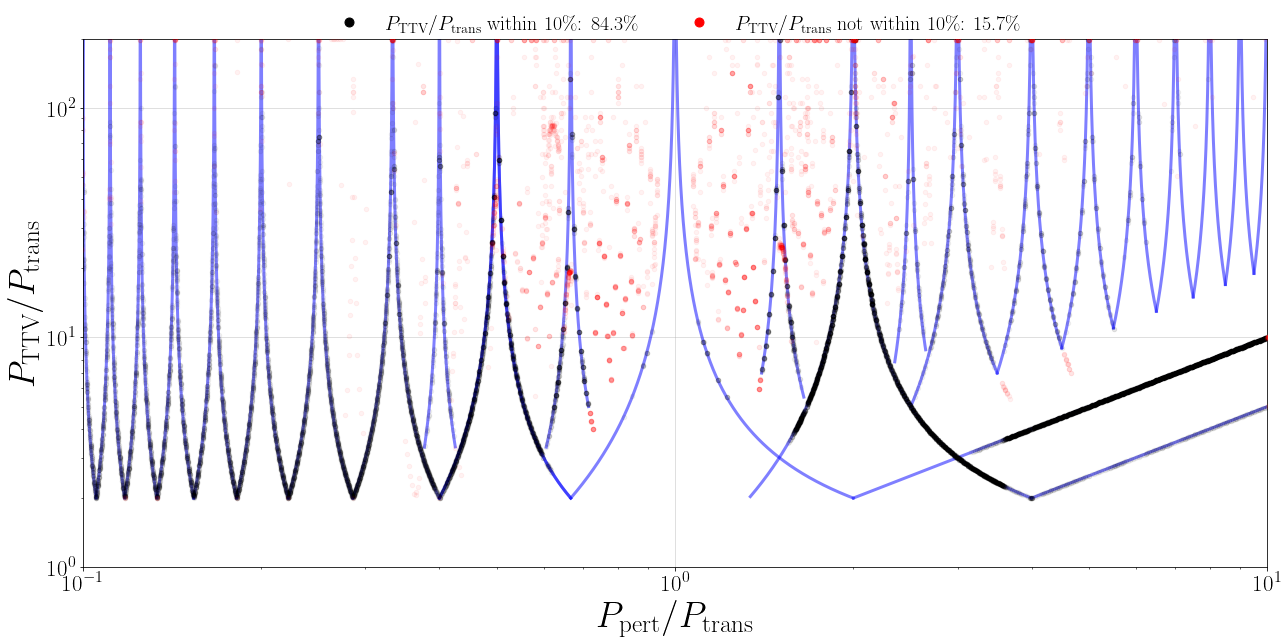

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# ---------------------------------------------
# DATA EXTRACTION WITH AMPLITUDE FILTERS
# ---------------------------------------------

# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []
combined_amplitude_ttv = []

# Loop to collect data
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(
    zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)
):
    for row in range(0, 2):  # both eccentricities
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])
                    combined_amplitude_ttv.extend(amp_ttv[selected_indices])

# Convert to numpy arrays
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)
combined_amplitude_ttv = np.array(combined_amplitude_ttv)

# Apply amplitude ceiling cut (< 1000)
amp_ceiling_cut = combined_amplitude_ttv < 1000
filtered_ppert_over_ptrans = combined_ppert_over_ptrans[amp_ceiling_cut]
filtered_P1ttv = combined_P1ttv[amp_ceiling_cut]
filtered_amplitude_ttv = combined_amplitude_ttv[amp_ceiling_cut]

# ---------------------------------------------
# CONSISTENCY CHECK
# ---------------------------------------------

# Build your analytic curves (assuming analytic_curves list already defined elsewhere)
# Here I assume you're re-using your previous analytic_curves definition.

tolerance_fraction = 0.1

consistent_x = []
consistent_y = []
inconsistent_x = []
inconsistent_y = []

for p_numerical, P1ttv_numerical in zip(filtered_ppert_over_ptrans, filtered_P1ttv):
    consistent = False
    for p_analytic_array, P1ttv_analytic_array in analytic_curves:
        if p_numerical < p_analytic_array[0] or p_numerical > p_analytic_array[-1]:
            continue
        idx = np.argmin(np.abs(p_analytic_array - p_numerical))
        P1ttv_analytic = P1ttv_analytic_array[idx]

        if np.abs(P1ttv_numerical - P1ttv_analytic) < tolerance_fraction * P1ttv_analytic:
            consistent = True
            break

    if consistent:
        consistent_x.append(p_numerical)
        consistent_y.append(P1ttv_numerical)
    else:
        inconsistent_x.append(p_numerical)
        inconsistent_y.append(P1ttv_numerical)

total_points = len(consistent_x) + len(inconsistent_x)
consistency_fraction = len(consistent_x) / total_points * 100

# ---------------------------------------------
# DIAGNOSTIC PLOT
# ---------------------------------------------

fig, ax = plt.subplots(1, figsize=[18, 9])

# Plot analytic curves
for p_analytic_array, P1ttv_analytic_array in analytic_curves:
    ax.plot(p_analytic_array, P1ttv_analytic_array, color='blue', lw=3, alpha=0.5)

# Plot consistent points in black
ax.plot(consistent_x, consistent_y, color='black', ls='', marker='.', ms=9, zorder=10, alpha=0.05)

# Plot inconsistent points in red
ax.plot(inconsistent_x, inconsistent_y, color='red', ls='', marker='.', ms=9, zorder=10, alpha=0.05)

# Axis properties
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize=36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)
ax.grid(True, alpha=0.5)

# Legend
consistent_marker = mlines.Line2D([], [], color='black', marker='o', linestyle='', markersize=9, 
    label=fr'$P_\mathrm{{TTV}}/P_\mathrm{{trans}}$ within {tolerance_fraction*100:.0f}\%: {consistency_fraction:.1f}\%')

inconsistent_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='', markersize=9, 
    label=fr'$P_\mathrm{{TTV}}/P_\mathrm{{trans}}$ not within {tolerance_fraction*100:.0f}\%: {100-consistency_fraction:.1f}\%')

ax.legend(handles=[consistent_marker, inconsistent_marker], fontsize=20, loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=2, frameon=False)

plt.tight_layout()
plt.show()


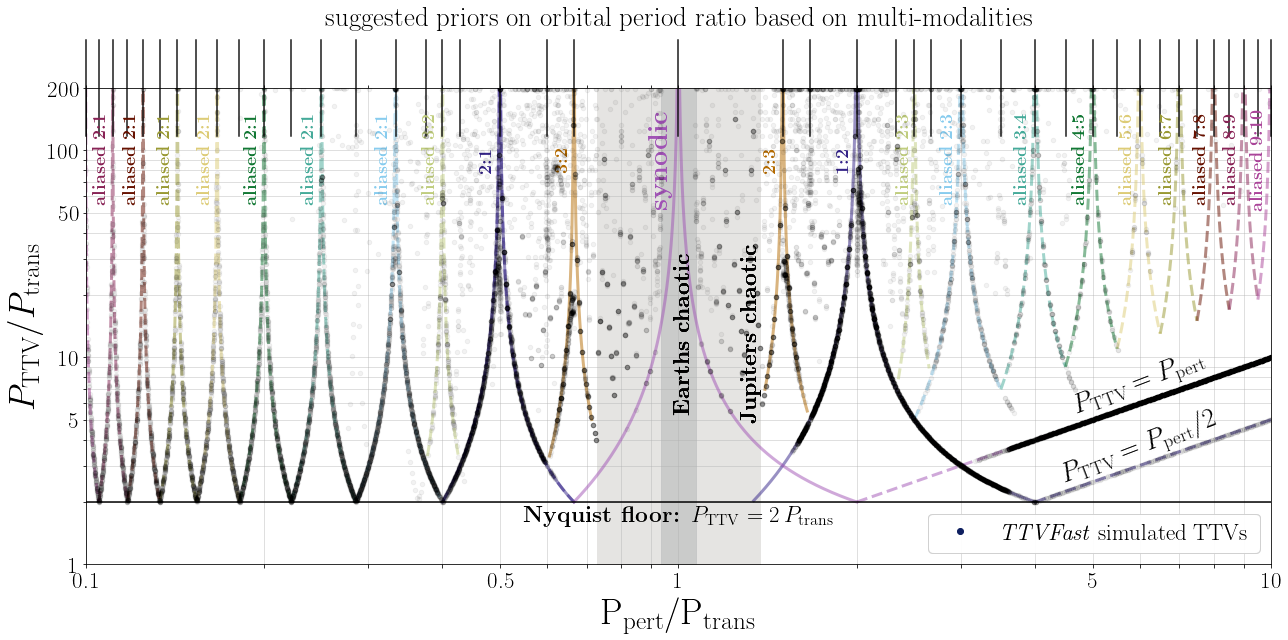

In [100]:
import matplotlib.lines as mlines

# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]



# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []

# Create a figure with two subplots
fig, ax = plt.subplots(1, figsize=[18, 9], sharex=True)

# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0,2):  # both eccentricities
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = ax.plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.05, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs', zorder=10000, ms=9)

# Repeat the above process for all rows in the second subplot
combined_ppert_over_ptrans = []
combined_P1ttv = []


















#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)





#plot analytic TTV perids




count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1


legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)



#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )

    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--', alpha=0.5)

    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1




#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2', alpha=0.5)

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2', alpha=0.5)


# Plot the analytic super periods oouter


# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)

    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m), alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1





#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--', alpha=0.5)

    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3', alpha=0.5)
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', alpha=0.5)
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-', alpha=0.5)

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)

    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--', alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{aliased '+str(k-1)+':'+str(k)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{aliased 2:3}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{aliased 2:1'+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{aliased 3:2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)







#check that the values in the paper are correct       
values_as_numbers = [
    0.1,
    0.10526315789473684,
    0.1111111111111111,
    0.11764705882352941,
    0.125,
    0.13333333333333333,
    0.14285714285714285,
    0.15384615384615385,
    0.16666666666666666,
    0.18181818181818182,
    0.2,
    0.2222222222222222,
    0.25,
    0.2857142857142857,
    0.3333333333333333,
    0.375,
    0.4,
    0.42857142857142855,
    0.5,
    0.6,
    0.6666666666666666,
    1.0,
    1.5,
    1.6666666666666667,
    2.0,
    2.3333333333333335,
    2.5,
    2.6666666666666665,
    3.0,
    3.5,
    4.0,
    4.5,
    5.0,
    5.5,
    6.0,
    6.5,
    7.0,
    7.5,
    8.0,
    8.5,
    9.0,
    9.5,
    10.0
]

i = -21
for ii in range(0, len(values_as_numbers)):
    per=values_as_numbers[ii]
    ax.axvline(per, .9, 1.1, color='k', alpha=.9, clip_on=False)





ax.text(6, 7.5, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=21, color='k', ha='center', va='center')
ax.text(6, 3.7, r'$P_\mathrm{TTV} = P_\mathrm{pert}/2$', fontsize=27, rotation=21, color='k', ha='center', va='center')

    
#add title labeling the prior ranges 
plt.title(r"suggested priors on orbital period ratio based on multi-modalities", pad=63, fontsize=27)

    

# Set plot properties
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)



# Custom proxy artist for the legend with alpha=1
ttvfast_legend_marker = mlines.Line2D([], [], color='#0e1f60', marker='o', linestyle='', alpha=1, label=r'\textit{TTVFast} simulated TTVs')

# Add the legend to top subplot
lines = [ttvfast_legend_marker]
labs = [line.get_label() for line in lines]
legend = ax.legend(lines, labs, fontsize=23, loc=4)
ax.add_artist(legend)


fig.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape_NHFP.pdf')



plt.show()

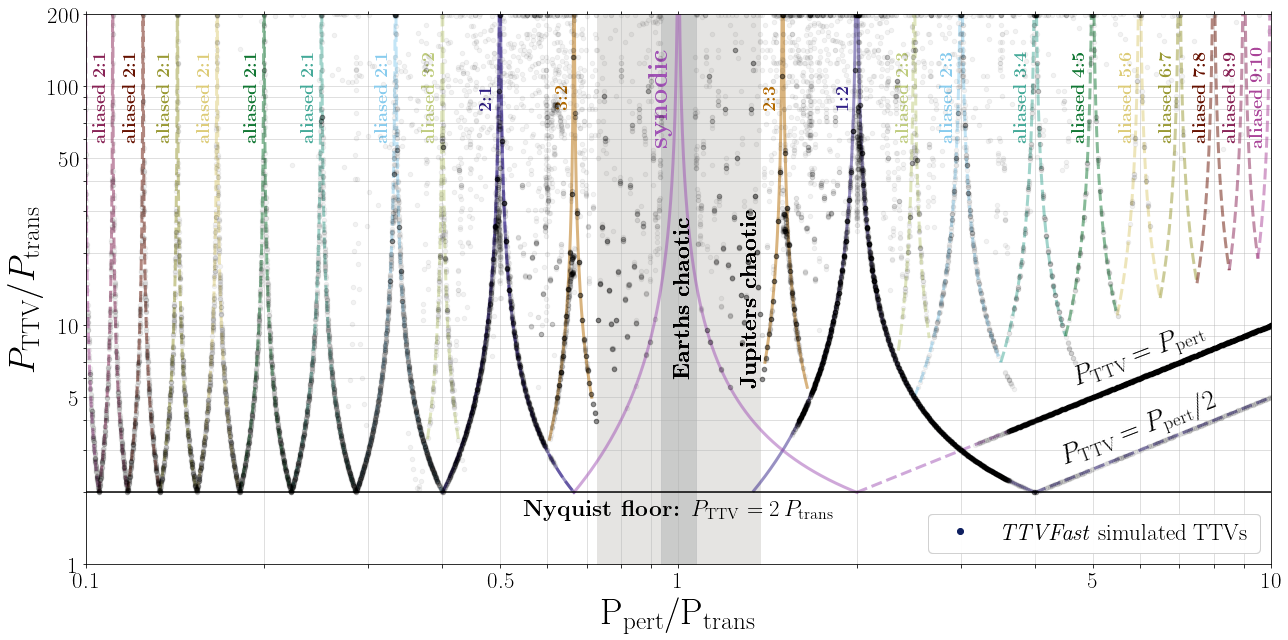

In [101]:
import matplotlib.lines as mlines

# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]



# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []

# Create a figure with two subplots
fig, ax = plt.subplots(1, figsize=[18, 9], sharex=True)

# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0,2):  # both eccentricities
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = ax.plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.05, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs', zorder=10000, ms=9)

# Repeat the above process for all rows in the second subplot
combined_ppert_over_ptrans = []
combined_P1ttv = []


















#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)





#plot analytic TTV perids




count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1


legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)



#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )

    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--', alpha=0.5)

    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1




#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2', alpha=0.5)

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2', alpha=0.5)


# Plot the analytic super periods oouter


# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3, alpha=0.5)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)

    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m), alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1





#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--', alpha=0.5)

    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3', alpha=0.5)
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', alpha=0.5)
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-', alpha=0.5)

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)

    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--', alpha=0.5)

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{aliased '+str(k-1)+':'+str(k)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{aliased 2:3}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{aliased 2:1'+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{aliased 3:2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)









ax.text(6, 7.5, r'$P_\mathrm{TTV} = P_\mathrm{pert}$', fontsize=27, rotation=21, color='k', ha='center', va='center')
ax.text(6, 3.7, r'$P_\mathrm{TTV} = P_\mathrm{pert}/2$', fontsize=27, rotation=21, color='k', ha='center', va='center')

    


    

# Set plot properties
ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)

ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 36)
ax.set_ylabel(r'$P_\mathrm{TTV}/P_\mathrm{trans}$', fontsize=36)



# Custom proxy artist for the legend with alpha=1
ttvfast_legend_marker = mlines.Line2D([], [], color='#0e1f60', marker='o', linestyle='', alpha=1, label=r'\textit{TTVFast} simulated TTVs')

# Add the legend to top subplot
lines = [ttvfast_legend_marker]
labs = [line.get_label() for line in lines]
legend = ax.legend(lines, labs, fontsize=23, loc=4)
ax.add_artist(legend)


fig.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape_yale_transition.pdf')



plt.show()

2
0.5
3
0.3333333333333333
3.5
0.2857142857142857
4
0.25
4.5
0.2222222222222222
5
0.2
5.5
0.18181818181818182
6
0.16666666666666666
6.5
0.15384615384615385
7
0.14285714285714285
7.5
0.13333333333333333
8
0.125
8.5
0.11764705882352941
9
0.1111111111111111
9.5
0.10526315789473684
10
0.1
10.5
0.09523809523809523
0.6666666666666666
1.5
0.4
2.5
1
1.6666666666666667
0.6
2.3333333333333335
0.42857142857142855
2.6666666666666665
0.375


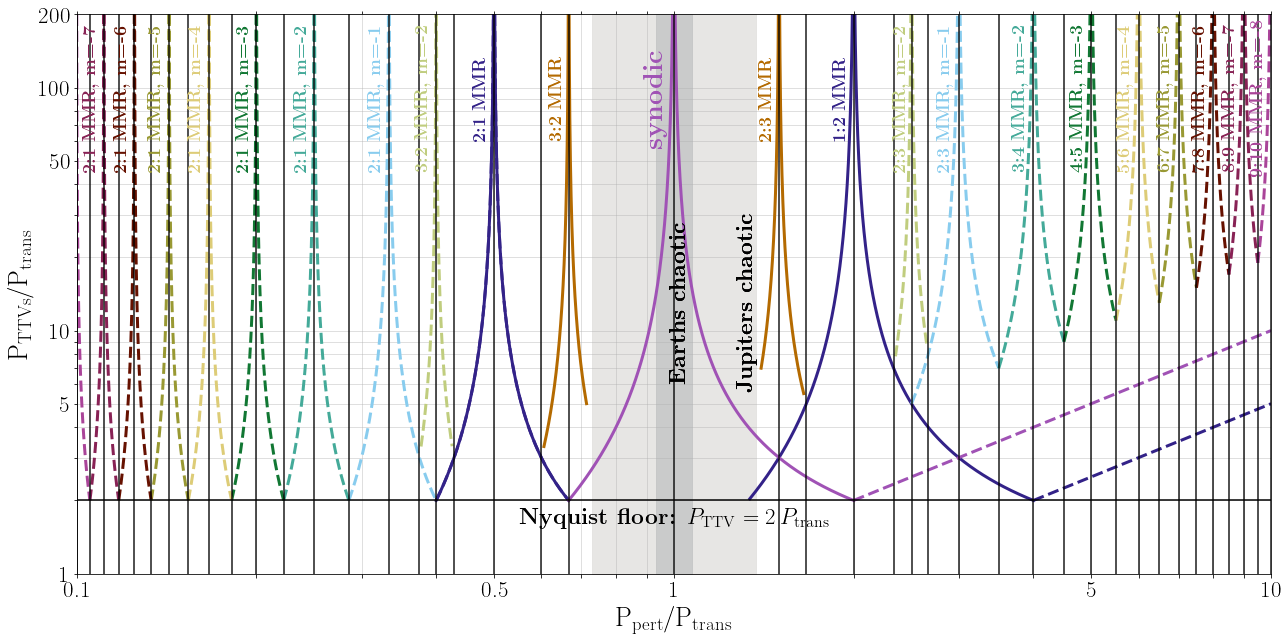

In [102]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    


#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--')
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2')


# Plot the analytic super periods oouter

    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

    
    
    
    
#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{'+str(k-1)+':'+str(k)+' MMR, m=-'+str(k-2)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{2:3 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{2:1 MMR, m=-'+str(ii)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{3:2 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#check period prior boundaries
for per in range(2, 11):
    ax.axvline(per, 0, 1, color='k', alpha=.9)
    print(per)
    ax.axvline(1/per, 0, 1, color='k', alpha=.9)
    print(1/per)

    if per != 2:
        ax.axvline(per+.5, 0, 1, color='k', alpha=.9)
        print(per+.5)
        ax.axvline(1/(per+.5), 0, 1, color='k', alpha=.9)
        print(1/(per+.5))

        
ax.axvline(2/3, 0, 1, color='k', alpha=.9)
ax.axvline(3/2, 0, 1, color='k', alpha=.9)    
ax.axvline(2/5, 0, 1, color='k', alpha=.9)    
ax.axvline(5/2, 0, 1, color='k', alpha=.9)    
ax.axvline(1, 0, 1, color='k', alpha=.9)    
ax.axvline(5/3, 0, 1, color='k', alpha=.9)    
ax.axvline(3/5, 0, 1, color='k', alpha=.9)    
ax.axvline(7/3, 0, 1, color='k', alpha=.9)    
ax.axvline(3/7, 0, 1, color='k', alpha=.9)    
ax.axvline(8/3, 0, 1, color='k', alpha=.9)    
ax.axvline(3/8, 0, 1, color='k', alpha=.9)      
print(2/3)
print(3/2)
print(2/5)
print(5/2)
print(1)
print(5/3)
print(3/5)
print(7/3)
print(3/7)
print(8/3)
print(3/8)
    
    

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/analytic_landscape.pdf')



plt.show()


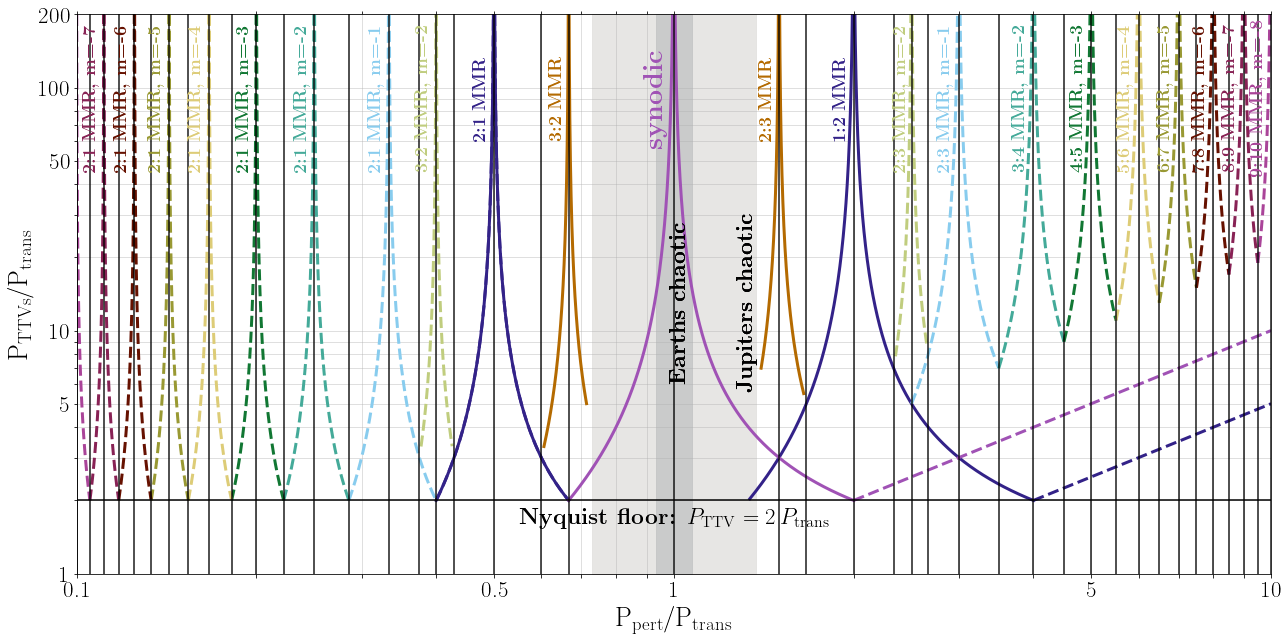

In [103]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[18,9], sharex = True)





count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    


#plot 2:1
p2p1_analytic = np.arange(1/2.5, 1/1.5, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )
    
    line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color=colors[count], lw=3, ls='--')
    
    if m == 0:
        alias_legend_dict[r'$2:1$'] = colors[count]
    else:
        alias_legend_dict[r'aliased $2:1$, m = ' + str(m)] = colors[count]
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '3 : 2')

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--', label = 'aliased 3 : 2, m = -2')


# Plot the analytic super periods oouter

    
# Extend 1:2 periods until Nyquist floor
p2p1_analytic = np.arange(1.34, 4, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color=colors[0], lw=3)


# Plot aliased 1:2 periods
count = 0
alias_legend_dict = {}
for alias_range in [[4, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, k_analytic), m)
    
    line8 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#332288', lw=3, ls='--',
                   label=r'$1:2$ super-period, m = ' + str(m))
    
    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

    
    
    
    
#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3  
    p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = colors[k-2], lw=3, ls='--')
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#b46a00', lw=3, ls='-', label = '2 : 3')
alias_legend_dict['2 : 3'] = '#b46a00'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#c0cd7e', lw=3, ls='--')
alias_legend_dict['4 : 5, m = -2'] = '#c0cd7e'


# Plot synodic period
p2p1_analytic = np.arange(1/1.5, 2, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#A052B5', lw=3, ls='-')

# Plot aliased synodic period
count = 0
alias_legend_dict = {}
for alias_range in [[2, 10]]:
    p2p1_alias_range_analytic = np.arange(alias_range[0], alias_range[1], .0001)
    j_analytic = 1
    k_analytic = 2
    m = -1
    pttv_alias_range_analytic = alias_period(synodic_period_norm(p2p1_alias_range_analytic), m)
    
    line9 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#A052B5', lw=3,
                   label='synodic period, m = ' + str(m), ls='--')

    alias_legend_dict['m = ' + str(m)] = colors[count]
    count += 1

# Plot Nyquist floor
ax.axhline(2, 0, 1, color='k')
ax.text(1, 1.6, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



#determine instability from overlapping resonances Deck+2013 eq 49
jup_ratio = 1+2.2*(2*1e-3)**(2/7)
earth_ratio = 1+2.2*(2*3e-6)**(2/7)

# Shade between 1.05 and 1/1.05 (grey) and 1.3 and 1/1.3 (lighter grey)
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region
ax.fill_betweenx([1, 200], 1/earth_ratio, earth_ratio, color='#71797E', alpha=.7)  # Jupiter mass chaotic region
ax.fill_betweenx([1, 200], 1/jup_ratio, jup_ratio, color='#E5E4E2', alpha=.7)  # Earth mass chaotic region


# Add vertical labels inside the shaded regions
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(earth_ratio-.05, 13, r'\textbf{Earths chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)
ax.text(jup_ratio-.05, 13, r'\textbf{Jupiters chaotic}', color='black', fontsize=23, ha='center', va='center', rotation=90)

#add mmr labels outer
ax.text(2-.1, 90, r'\textbf{1:2 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for k in range(3, 11):
    ii=k-2
    ax.text((ii)+2-(.05*(ii+1))-.05, 90, r'\textbf{'+str(k-1)+':'+str(k)+' MMR, m=-'+str(k-2)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)
#add 2:3 label
ax.text(3/2-.07, 90, r'\textbf{2:3 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 2:3 label alias m=-2
ax.text(5/2-.1, 90, r'\textbf{2:3 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)





#add mmr labels inner
ax.text(1/2-.025, 90, r'\textbf{2:1 MMR}', color=colors[0], fontsize=18, ha='center', va='center', rotation=90)
for ii in range(1, 8):
    ax.text(1/(ii+2+(.05*(ii+1))+.05), 90, r'\textbf{2:1 MMR, m=-'+str(ii)+'}', color=colors[ii], fontsize=18, ha='center', va='center', rotation=90)

#add synodic label
ax.text(.93, 90, r'\textbf{synodic}', color='#A052B5', fontsize=27, ha='center', va='center', rotation=90)

#add 3:2 label
ax.text(2/3-.03, 90, r'\textbf{3:2 MMR}', color='#b46a00', fontsize=18, ha='center', va='center', rotation=90)

#add 3:2 label alias m=-2
ax.text(2/5-.02, 90, r'\textbf{3:2 MMR, m=-2}', color='#c0cd7e', fontsize=18, ha='center', va='center', rotation=90)




#check that the values in the paper are correct       
values_as_numbers = [
    0.1,
    0.10526315789473684,
    0.1111111111111111,
    0.11764705882352941,
    0.125,
    0.13333333333333333,
    0.14285714285714285,
    0.15384615384615385,
    0.16666666666666666,
    0.18181818181818182,
    0.2,
    0.2222222222222222,
    0.25,
    0.2857142857142857,
    0.3333333333333333,
    0.375,
    0.4,
    0.42857142857142855,
    0.5,
    0.6,
    0.6666666666666666,
    1.0,
    1.5,
    1.6666666666666667,
    2.0,
    2.3333333333333335,
    2.5,
    2.6666666666666665,
    3.0,
    3.5,
    4.0,
    4.5,
    5.0,
    5.5,
    6.0,
    6.5,
    7.0,
    7.5,
    8.0,
    8.5,
    9.0,
    9.5,
    10.0
]
for per in values_as_numbers:
    ax.axvline(per, 0, 1, color='k', alpha=.9)


    
    

ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)




ax.set_xlabel(r'P$_\mathrm{pert}$/P$_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'P$_\mathrm{TTVs}$/P$_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/analytic_landscape.pdf')



plt.show()

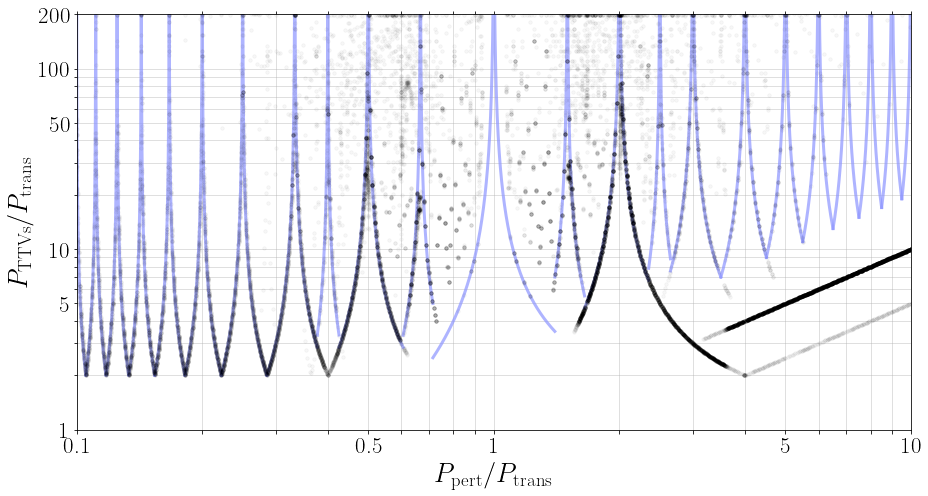

In [107]:
# now lets plot the original super period vs. aliased 1:2 periods
fig, ax = plt.subplots(1, figsize=[13,7], sharex = True)



# Directories for each column
directories = [directories1, directories2, directories3, directories4]

# Corresponding data lists for each directory set
orbital_params_all = [orbital_params_all1, orbital_params_all2, orbital_params_all3, orbital_params_all4]
lstsq_ptrans_all = [lstsq_ptrans_all1, lstsq_ptrans_all2, lstsq_ptrans_all3, lstsq_ptrans_all4]
lstsq_ppert_all = [lstsq_ppert_all1, lstsq_ppert_all2, lstsq_ppert_all3, lstsq_ppert_all4]
P_1_ttv_all = [P_1_ttv_all1, P_1_ttv_all2, P_1_ttv_all3, P_1_ttv_all4]
amplitude_ttv_all = [amplitude_ttv_all1, amplitude_ttv_all2, amplitude_ttv_all3, amplitude_ttv_all4]



# Initialize lists to store combined filtered data
combined_ppert_over_ptrans = []
combined_P1ttv = []


# Subplot 1: Loop through a range of rows (e.g., first 1 row)
for col, (dir_set, orbital_params, lstsq_ptrans, lstsq_ppert, P_1_ttv, amplitude_ttv) in enumerate(zip(directories, orbital_params_all, lstsq_ptrans_all, lstsq_ppert_all, P_1_ttv_all, amplitude_ttv_all)):
    for row in range(0,2):  # both eccentricities
        for ii in range(len(P_1_ttv[row])):
            hill_checks = []
            chaos_checks = []

            mu_trans = orbital_params[row][ii][0]
            mu_pert = orbital_params[row][ii][1]
            e_trans = orbital_params[row][ii][2]
            e_pert = orbital_params[row][ii][3]
            w_trans = orbital_params[row][ii][4]
            w_pert = orbital_params[row][ii][5]

            for jj in range(len(lstsq_ppert[row][ii])):
                P_trans = lstsq_ptrans[row][ii][jj]
                P_pert = lstsq_ppert[row][ii][jj]

                hill_check = hill_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert)
                chaos_check = chaos_stability_check(mu_trans, mu_pert, P_trans, P_pert, e_trans, e_pert, w_trans, w_pert)

                hill_checks.append(hill_check)
                chaos_checks.append(chaos_check)

            ppert_over_ptrans = np.array(lstsq_ppert[row][ii]) / np.array(lstsq_ptrans[row][ii])
            P1ttv = np.array(P_1_ttv[row][ii])
            amp_ttv = np.array(amplitude_ttv[row][ii])

            hill_checks = np.array(hill_checks)
            chaos_checks = np.array(chaos_checks)

            if hill_checks.size > 0 and chaos_checks.size > 0:
                # Find indices where both hill_check and chaos_check are True
                initial_selected_indices = np.where(hill_checks & chaos_checks)[0]

                # Further filter to include only where amplitude_ttv > 10/60 -- or 10 seconds
                if amp_ttv.size > 0:
                    selected_indices = initial_selected_indices[amp_ttv[initial_selected_indices] > (60./60.)]

                    # Add selected data to combined lists
                    combined_ppert_over_ptrans.extend(ppert_over_ptrans[selected_indices])
                    combined_P1ttv.extend(P1ttv[selected_indices])

# Convert lists to numpy arrays for plotting
combined_ppert_over_ptrans = np.array(combined_ppert_over_ptrans)
combined_P1ttv = np.array(combined_P1ttv)

# Plot the combined filtered data in the first subplot
if combined_ppert_over_ptrans.size > 0 and combined_P1ttv.size > 0:
    line0 = ax.plot(combined_ppert_over_ptrans, combined_P1ttv, color='k', alpha=.03, ls='', marker='.',
                        label = r'\textit{TTVFast} simulated TTVs', zorder=10000, ms=7)


    
    
    
    
    
    
#analytic solutions

count=0
for j in resonances:
    colors_dict[j] = colors[count]
    count+=1
    
    
legend_dict = colors_dict.copy()

for j in resonances:
    legend_dict['1 : '+str(j)] = legend_dict.pop(j)
    


#plot 2:1
p2p1_analytic = np.arange(1/2.35, 1/1.65, .0001)
j_analytic = 2
k_analytic = 1
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, alpha=0.7)


# plot aliased 2:1 periods
m = 0
count = 0
alias_legend_dict = {}
for alias_range in alias_ranges:
    if m == -1:
        p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/2.65, .0001)
    else:
        p2p1_alias_range_analytic = np.arange(1/alias_range[1], 1/alias_range[0], .0001)
    j_analytic = 2
    pttv_alias_range_analytic = alias_period(super_period_norm(p2p1_alias_range_analytic, j_analytic, 1), m )


    if m != 0:
        line2 = ax.plot(p2p1_alias_range_analytic, pttv_alias_range_analytic, color='#8c94ff', lw=3, ls='-', alpha=0.7)
    m -= 1
    count += 1



    
#add 3:2
p2p1_analytic = np.arange(1/1.65, 1/1.4, .0001)
j_analytic = j_nearest_k(p2p1_analytic, 2)
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, 2)
line2 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = '3 : 2', alpha=0.7)

#add another aliased 3:2  
p2p1_analytic = np.arange(1/2.65, 1/2.35, .0001)
j_analytic = 3
k_analytic = 2
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line4 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = 'aliased 3 : 2, m = -2', alpha=0.7)









####
####
# Plot the analytic super periods outer

    
# plot 1:2
p2p1_analytic = np.arange(1.65, 5/2-.15, .0001)
j_analytic = 1
k_analytic = 2
pttv_analytic = super_period_norm(p2p1_analytic, j_analytic, k_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, alpha=0.7)


    
    
    
#plot alias of first order resonances
for k in range(3, 11):
    #add aliased 2:3
    if k == 3:
        p2p1_analytic = np.arange(5/2+.15, k+.5, .0001)
    else:
        p2p1_analytic = np.arange(k-.5, k+.5, .0001)
    j_analytic = k-1
    k_analytic = k
    pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -(k-2) )
    ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', alpha=0.7)
    
    alias_legend_dict[str(j_analytic)+' : '+str(k_analytic)+', m = ' + str(-(k-2))] = colors[k-2]


#add 2:3
p2p1_analytic = np.arange(1.4, 1.65, .0001)
pttv_analytic = super_period_norm(p2p1_analytic, 2, 3)
ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', label = '2 : 3', alpha=0.7)
alias_legend_dict['2 : 3'] = '#8c94ff'


#add aliased 4:5  
p2p1_analytic = np.arange(5/2-.15, 5/2+.15, .0001)
j_analytic = 4
k_analytic = 5
pttv_analytic = alias_period( super_period_norm(p2p1_analytic, j_analytic, k_analytic), -2 )
line3 = ax.plot(p2p1_analytic, pttv_analytic, color = '#8c94ff', lw=3, ls='-', alpha=0.7)
alias_legend_dict['4 : 5, m = -2'] = '#8c94ff'


# Plot synodic period
p2p1_analytic = np.arange(1/1.4, 1.4, .0001)
pttv_analytic = synodic_period_norm(p2p1_analytic)
ax.plot(p2p1_analytic, pttv_analytic, color='#8c94ff', lw=3, ls='-', alpha=0.7)



# Plot Nyquist floor
#ax.axhline(2, 0, 1, color='k')
#ax.text(1, 1.4, r'\textbf{Nyquist floor: $P_\mathrm{TTV} = 2 \, P_\mathrm{trans}$}', fontsize=23, ha='center', color='k')



ax.set_yscale("log", base=10)
ax.set_xscale("log", base=10)
ax.set_xlim(.1, 10)
ax.set_ylim(1, 200)
ax.set_xticks([.1, .2, .3, .4, .5, .6, .7, .8, .9, 
               1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax.set_xticklabels([.1, '', '', '', .5, '', '', '', '', 
                    1, '', '', '', 5, '', '', '', '', 10])
ax.set_yticks([1, 2, 3, 4, 5, 6, 7, 8, 9,
               10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200])
ax.set_yticklabels([1, '', '', '', 5, '', '', '', '',
                    10, '', '', '', 50, '', '', '', '', 100, 200])
ax.tick_params(axis='x', which='both', bottom=True, top=True)
ax.tick_params(axis='y', which='both', bottom=True, top=True)

ax.grid(True, alpha=0.5)



ax.set_xlabel(r'$P_\mathrm{pert}/P_\mathrm{trans}$', fontsize = 27)
ax.set_ylabel(r'$P_\mathrm{TTVs}/P_\mathrm{trans}$', fontsize = 27)


plt.tight_layout()
plt.savefig('./figures/analytic_numerical_landscape_simple.pdf')



plt.show()